# Open Science Survey Primary Analysis

## Looking at the questions section by section

**First** want to read into *DataFrames*
<br /> **Second** want to create *Responder Class* with *metrics as attributes*
<br /> **Third** want to populate *Responder List* with each response
<br /> **Fourth** want to create *Total Scores List*
<br /> **Fifth** want to create *ANOVAs*
<br /><br /> **Identify data** using *object address converted to hexadecimal*; anonymous responses cannot be traced

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

#read data
data_raw = pd.read_excel('FinalResponses.xlsx')

print("Done! :D See table below")

#display initial table:
#display(HTML(data_raw.to_html()))

print("End! :)")


Done! :D See table below
End! :)


In [8]:
print(data_raw.iloc[0,6])
#intro
1 --> role
2--> what is perception of OS (1 pos -- 5 neg)
    graph
3 -->What is OS
4 --> can OS help you (y/n/m)
    graph

#Innovations
29 --> relationship between (neutral, AD)
30,59,60 --> rights claims (Ind, Research, Public)
    Frequency count histogram
31 --> academia/industry partnership (1 academic -- 5 industry)
32-38 --> T/F Innovation
    -OS --> 32
    +OS --> 35
    -Pa --> 36, 37
    +Pa --> 33, 34
    Score for Pa and OS
56 --> academia/industry OS engagement checklist 
    Frequency count histogram
61--> interest in patenting in the future
    Frequency count histogram
62--> what would motivate to adopting OS
    Frequency count histogram
39-->Please explain your answer

#in practice
40-49 --> T/F OS in Practice
    -OS --> 40, 42, 44, 46, 48 -PI
    +OS --> 41, 43, 45, 47, 49 +PI

57,58 --> plan for storage of data researcher vs institute

50-->please explain 

#data/access
5-10-->publication 
    -OS --> 7, 8, 
    +OS --> 6, 9,

11-17-->Archives
    -OS --> 13, 
    +OS --> 12, 14, 15, 16

18-23 --> ELab NB
    -OS --> 
    +OS --> 19, 20, 21, 22

24-28-->Patents
    -OS --> 26
    +OS --> 
    -Pa --> 
    +Pa --> 25, 27, 28

Open Data: 
    13; 12, 14, 15, 16, 19, 20, 21, 22
Open Access:
    7, 8, 26; 6, 9
Open Science: use PI scores

5, 11, 18, 24 --> knowledge qs
10, 17, 23 --> explain the above qs


#conclusions
51, 52--> survey change mind on OS
53 --> how you feel abt open science
54 --> can OS help in practice
55 --> most interested 







SyntaxError: invalid syntax (<ipython-input-8-3afd8160d1c1>, line 3)

In [2]:
#Parse by sections:

#Preliminary index 1-4, section 1
data_Pre = data_raw.iloc[:,1:4]

#Access index 7-35, section 2
data_Acc = data_raw.iloc[:,5:28]

#Innovation/Industry index 36-50, section 3
data_Inn = data_raw.iloc[:,pd.np.r_[29:39,56,59:62]]

#Practice index 51-64, section 4
data_Prc = data_raw.iloc[:,pd.np.r_[40:50,57,58]]

#Conclusion index 65-70, section 5
data_Con = data_raw.iloc[:,51:55]

#optional long answers compiled: index 14, 21, 27, 35, 49, 63 
data_know = data_raw.iloc[:,[5, 11, 18, 24]]

#display(HTML(data_know.to_html()))

#create a list of responses:
responders = []

print("Done!")


Done!


In [3]:
#Creating a Responder Class 
class Responder:
    def __init__(self, user):
        self.user = user # 1) User type
        self.expertise = [] # 2) Expertise (OS, Publishing, Archives, ELabNtbk, Patent, License)
        self.OS_perception = [] # 3) OS Perception rating (Pre, Post, Change)
        self.OS_help = [] # 4) OS Help rating (Pre, Post, Change)
        self.P_Score = 0.0 # 5) Patent Score
        self.PI_Score = 0.0 # 6) PI Score
        self.Industry_Relation = 0 # 7) Industry relation Score
        self.rights = [] # 8) Rights Score (Industry, Academic, Taxpayer)
        self.motive = 0 # 9) motivation to adopt OS
        self.OSS = 0 # 10) OS Score
        self.engage = []
        self.user_id = 0
        self.raw_vals = {}
    
    #All the setter methods
    
    def set_exp(self, exp):
        self.expertise = exp
        
    def set_OS_per(self, OS_per):
        self.OS_perception = OS_per
    
    def set_OS_help(self,OS_help):
        self.OS_help = OS_help
    
    def set_P_Score(self, P_Score):
        self.P_Score = P_Score
        
    def set_PI_Score(self,PI_Score):
        self.PI_Score = PI_Score
        
    def set_IR(self, IR):
        self.Industry_Relation = IR
        
    def set_rights(self, rights):
        self.rights = rights
        
    def set_motive(self,mot):
        self.motive = mot
        
    def set_OSS(self, OSS):
        self.OSS = OSS
        
    def set_engage(self, eng):
        self.engage = eng
    
    def set_id(self, user_id):
        self.user_id = user_id #hexadecimal address as identity
    
    def show(self): 
        print(self.user_id, " is a ", self.user, " with an OSS Score of ", self.OSS, " and P of ", self.P_Score)
        
    def set_raw_vals(self, intro, inno, prac, acc, con):
        self.raw_vals = {"Intro":intro,
                         'Innovation':inno,
                        "Practice":prac,
                        "Access":acc,
                        "Conclusion":con}
    

In [16]:
def convert(Bool, arr):
    if Bool==True:
        t = 1
        f = -1
    else:
        t = -1
        f = +1
    arr2 = arr
    for i in range(len (arr)):
        if arr[i] == True:
            arr2[i] = t
        else:
            arr2[i] = f
    return arr2

#Populating the Responder List
#print(data_raw.iloc[:,1])
responders = [Responder(x) for x in data_raw.iloc[:,1]]

#print(responders)

#now provide the correct attributes
Students = []
PIs = []
Staff = []

for i in range(0,len(responders)):
    curr = responders[i]
    #print(curr)
    curr.set_id(hex(id(curr)))
    curr.set_exp([x for x in list(data_raw.iloc[i,[5, 11, 18, 24]])])
    curr.set_OS_per([6-x for x in list(data_raw.iloc[i,[2,53]])])
    curr.set_OS_help([x for x in list(data_raw.iloc[i,[4,54]])])
    curr.set_IR(data_raw.iloc[i,31])
    curr.set_rights([x for x in list(data_raw.iloc[i,[30,60,61]])])
    curr.set_motive(data_raw.iloc[i,62])
    curr.set_engage(data_raw.iloc[i,56])
    #print(data_raw.iloc[i,57])
    #PI Values
    TF_pos = convert(True, list(data_raw.iloc[i,[35, 41, 43, 45, 47, 49]]))
    TF_neg = convert(False, list(data_raw.iloc[i,[32, 40, 42, 44, 46, 48]]))
    #OS Values
    OS_pos = [4-x for x in list(data_raw.iloc[i,[6, 9, 12, 14, 15, 16, 19, 20, 21, 22]])]
    OS_neg = [4-x for x in list(data_raw.iloc[i,[7, 8, 13, 26]])]
    #PA Values
    Pa_neg = convert(False, list(data_raw.iloc[i,[36,37]]))
    Pa_pos = convert(True, list(data_raw.iloc[i,[33,34]]))
    Pa_ad = [4-x for x in list(data_raw.iloc[i,[25,27,28]])]
    #Score Calculating
    PI_Score = np.sum(TF_pos[1:]) - np.sum(TF_neg[1:])
    OSS_Score = np.sum(TF_pos) + np.sum(OS_pos) - np.sum(TF_neg) - np.sum(OS_neg)
    Pa_Score = np.sum(Pa_pos) + np.sum(Pa_ad) - np.sum(Pa_neg)
    curr.set_PI_Score(PI_Score)
    curr.set_OSS(OSS_Score)
    curr.set_P_Score(Pa_Score)
    if curr.user == "Student":
        Students.append(curr)
    elif curr.user == "Staff":
        Staff.append(curr)
    else:
        PIs.append(curr)
    raw_intro = data_raw.iloc[i,2]
    raw_innovations = list(data_raw.iloc[i,pd.np.r_[31:38]])#not including 32-37; T/F
    raw_practice = list(data_raw.iloc[i,pd.np.r_[40:50]])
    raw_access = list(data_raw.iloc[i,pd.np.r_[6:10,12:17,19:23,25:29]])
    raw_conclusion = data_raw.iloc[i,53]
    curr.set_raw_vals(raw_intro, raw_innovations, raw_practice, raw_access, raw_conclusion)
print("Populating lists is complete! :)")



Populating lists is complete! :)


In [17]:
#Calculate PI score first


#Then Calc OSS

#Then Calc Pa

#OS Score 
#Positive (when Agree/T or 1 is for OS)
    #T/F 35, [41, 43, 45, 47, 49 +PI],  
    #if true +1, if false -1
    
    #AD 6, 9, 12, 14, 15, 16, 19, 20, 21, 22,
    #add 4-x (ranges from 3-0)

#Negative (when Agree/T or 1 is against OS)
    #T/F 32, [40, 42, 44, 46, 48 -PI], 
    #if true -1, if false +1
    
    #AD 7, 8, 13, 26
    #subtract 4-x (ranges from 3-0)

#Pa Score
#Positive (when Agree/T or 1 is against OS)
    #T/F 33, 34
    
    #AD 25, 27, 28

#Negative (when Agree/T or 1 is against OS)
    #T/F 36, 37
    
    #AD

def area_add(arr, arr2, name):
    x = [name for i in range(len(arr))]
    return arr2+x

import math

Intros = []
Innos = []
Pracs = []
Accs = []
Concs = []
users = []
exp = []


for r in responders:
    Intros.append(r.raw_vals["Intro"])
    #Innos.append(r.raw_vals["Innovation"][0:1])
    #Pracs.append(r.raw_vals["Practice"])
    for x in r.raw_vals["Access"]:
        Accs.append(x)
    Concs.append(r.raw_vals["Conclusion"])
    users.append(r.user)
    exp.append(r.expertise)
    
print(len(users))
print(len(Accs)/67)
print("Done populating raw values, time to make the DataFrames!")
scores=Intros+Accs+Concs

area_Type=["Intro" for i in range(len(Intros))]
#area_Type=area_Type+["Innovation" for i in range(len(Innos))]
#area_Type=area_Type+["Practice" for i in range(len(Pracs))]
area_Type=area_Type+["Access" for i in range(len(Accs))]
area_Type=area_Type+["Conclusion" for i in range(len(Concs))]

r_num = len(responders)

a_num = int(len(Intros)/r_num)
b_num = int(len(Innos)/r_num)
c_num = int(len(Pracs)/r_num)
d_num = int(len(Accs)/r_num)
e_num = int(len(Concs)/r_num)


questions = [i for i in range(0,a_num)]

questions2 = [i for i in range(a_num,a_num+d_num)]

questions3 = [i for i in range(a_num+d_num,a_num+d_num+e_num)]

qa = []
qb = []
qc = []

for i in range(r_num):
    qa+=questions.copy()
    qb+=questions2.copy()
    qc+=questions3.copy()

questions = qa+qb+qc

groups = []
subjects = []
curr = 0
for i in range(len(Intros)):
    for x in range(a_num):
        groups.append(users[i])
        subjects.append(i)
    curr=i
    
#curr2 = curr
#for i in range(curr, curr+len(Innos)):
#    for x in range(b_num):
#        groups.append(users[i-curr]) 
#        subjects.append(i-curr)
#    curr2 = i

curr3 = curr
x=0

for i in range(curr, curr+len(Accs)):
    if (x>=math.floor((i-curr)/d_num)):
        groups.append(users[x])
        subjects.append(x)
    else:
        x+=1
        groups.append(users[x])
        subjects.append(x)
    curr3=i
        
for i in range(curr3, curr3+len(Concs)):
    for x in range(e_num):
        groups.append(users[i-curr3])
        subjects.append(i-curr3)
        
#print(scores)

Anova_Data = pd.DataFrame({"Area":area_Type,"Group":groups, "Subject":subjects,"Question":questions, "Score":scores})

print(exp)



def value_Maker(arr):
    arr2=[]
    for val in arr:
        if val == "No" or val=="I don't know":
            arr2.append(0)
        else:
            arr2.append(1)
    return arr2

exp = [value_Maker(x) for x in exp]


exp2 = [sum(x) for x in exp]
print(exp2)
        

67
17.0
Done populating raw values, time to make the DataFrames!
[["I don't know", 'Yes', 'Yes', 'No'], ['Partly', 'Yes', 'Yes', 'Yes'], ["I don't know", 'No', 'Yes', 'Yes'], ["I don't know", 'No', 'Yes', 'No'], ["I don't know", 'No', 'Yes', 'Yes'], ['Yes', 'No', 'Yes', 'Yes'], ['Yes', 'No', 'Yes', 'No'], ['Partly', 'No', 'No', 'Yes'], ['Yes', 'Yes', 'Yes', 'Yes'], ["I don't know", 'No', 'Yes', 'No'], ['Yes', 'Yes', 'Yes', 'No'], ["I don't know", 'No', 'Yes', 'No'], ['Yes', 'No', 'No', 'No'], ['Yes', 'No', 'Yes', 'Yes'], ["I don't know", 'No', 'No', 'No'], ['Yes', 'Yes', 'Yes', 'No'], ['Partly', 'No', 'Yes', 'No'], ['Partly', 'No', 'No', 'No'], ['Yes', 'Yes', 'Yes', 'Yes'], ['Partly', 'Yes', 'Yes', 'No'], ['Partly', 'No', 'Yes', 'No'], ['Partly', 'Yes', 'Yes', 'No'], ["I don't know", 'No', 'No', 'No'], ['Partly', 'No', 'Yes', 'Yes'], ['Yes', 'No', 'No', 'No'], ['Yes', 'Yes', 'Yes', 'No'], ["I don't know", 'No', 'Yes', 'No'], ['No', 'Yes', 'Yes', 'No'], ['Yes', 'Yes', 'Yes', 'No'], ['Ye

The Average OSS for all is: 20.71641791044776
The Average OSS for PIs is: 17.2
The Average OSS for Staff is: 19.85185185185185
The Average OSS for Students is: 22.666666666666668
[17.2, 19.85185185185185, 22.666666666666668]


/Users/kartoffello/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/kartoffello/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


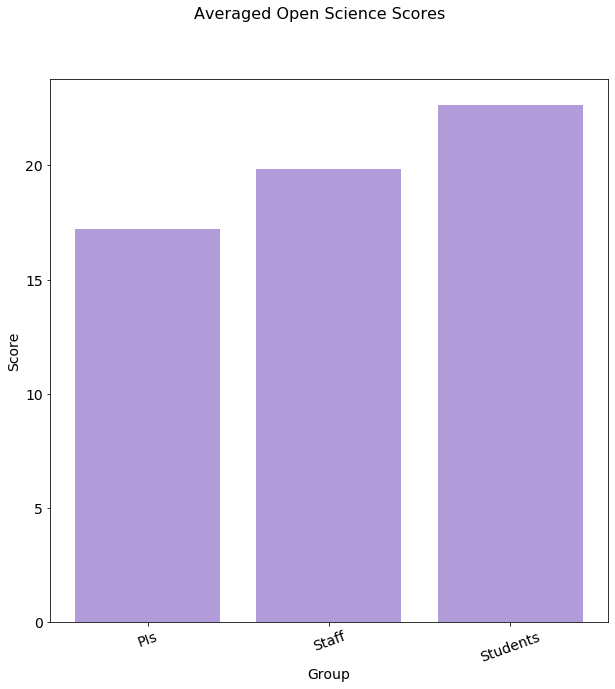

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The Average Patent Score for all is: 3.1791044776119404
The Average Patent Score for PIs is: 2.5
The Average Patent Score for Staff is: 3.1481481481481484
The Average Patent Score for Students is: 3.433333333333333


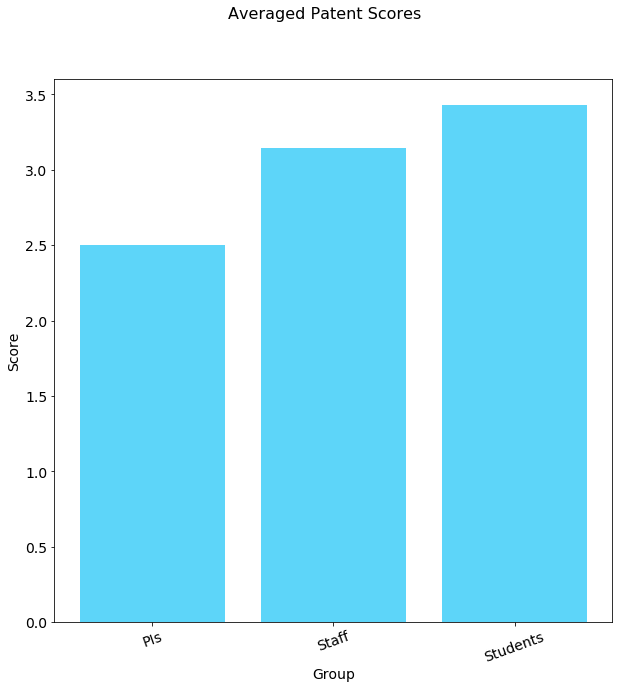

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The Average PI Score for all is: 1.5223880597014925
The Average PI Score for PIs is: -0.6
The Average PI Score for Staff is: 0.5925925925925926
The Average PI Score for Students is: 3.066666666666667


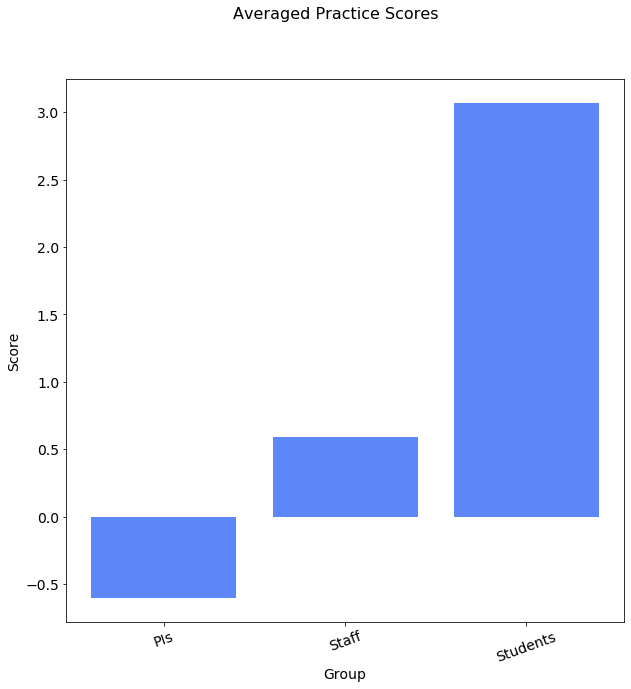

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The Average Industry Relation Score for all is: 3.253731343283582
The Average Industry Relation Score for PIs is: 3.4
The Average Industry Relation Score for Staff is: 3.074074074074074
The Average Industry Relation Score for Students is: 3.3666666666666667


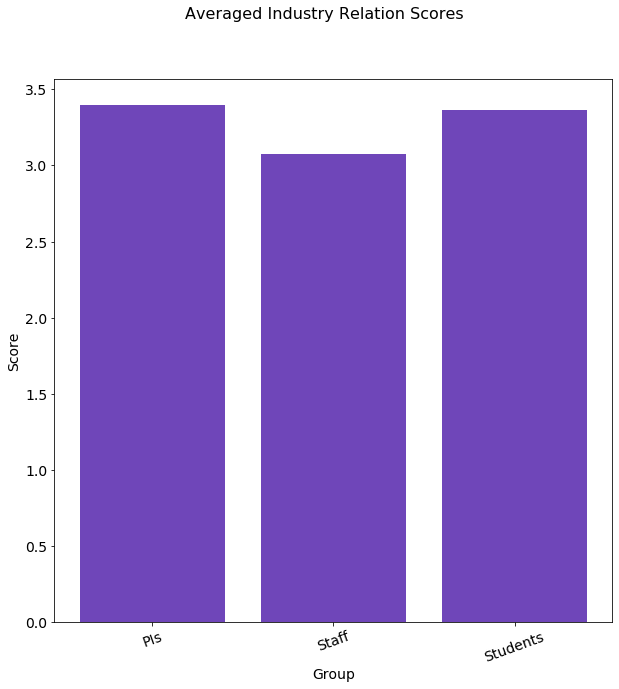

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The Average Perception Score for all started at:  4.08955223880597 
   Change was + 0.19402985074626855 
   Final result was:  4.2835820895522385
The Average Perception Score for PIs started at:  4.2 
   Change was + 0.20000000000000018 
   Final result was:  4.4
The Average Perception Score for Staff started at:  3.925925925925926 
   Change was + 0.3333333333333335 
   Final result was:  4.2592592592592595
The Average Perception Score for Students started at:  4.2 
   Change was + 0.06666666666666643 
   Final result was:  4.266666666666667
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The Average Expertise Score for all is: 2.298507462686567
The Average Expertise Score for PIs is: 3.1
The Average Expertise Score for Staff is: 2.4814814814814814
The Average Expertise Score for Students is: 1.8666666666666667


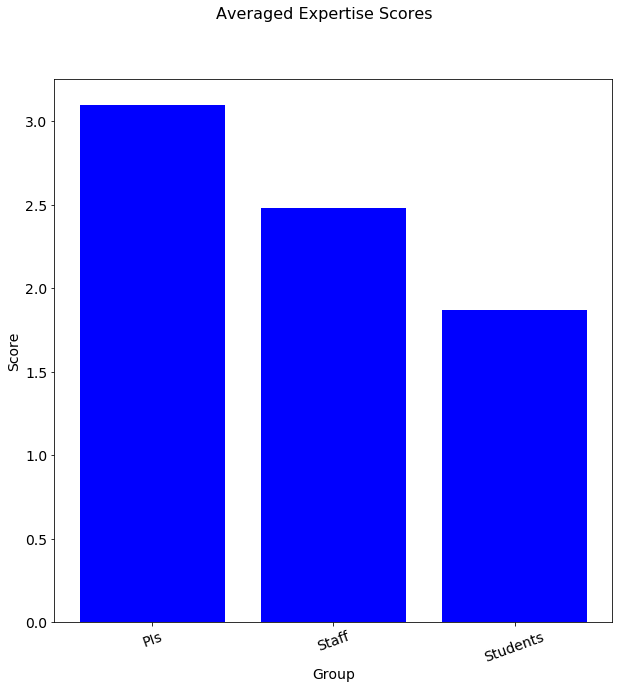

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Time to do the ANOVA! A two way mixed model:
 The columns are repeated measures representing metrics 
 The rows are PIs, Staff, and Students representing ind groups 
 The dv is the score from the questions

Averaged scores (raw):
                OSS   P_Score  PI_Score  IR_Score  Exp_Score        dv
PI       17.200000  2.500000 -0.600000  3.400000   3.100000       PIs
Staff    19.851852  3.148148  0.592593  3.074074   2.481481     Staff
Student  22.666667  3.433333  3.066667  3.366667   1.866667  Students

Z-score transformations, non-absolute:
               OSS   P_Score  PI_Score  IR_Score  Exp_Score
PI      -1.575394 -1.738984 -1.389834  0.998967   1.591820
Staff   -0.387335 -0.079270 -0.608871 -1.227000   0.363399
Student  0.873733  0.651004  1.011262  0.771311  -0.857666

Normalized Variables (within groups and metrics)
              OSS   P_Score  OP_Score  IR_Score  Exp_Score
PI       0.448000  0.437500  0.671429  0.200000   0.550000
Staff

In [19]:
def avg_Lister(PI_L, Staff_L, Stu_L, All_L):
    means = [np.average(PI_L), np.average(Staff_L), np.average(Stu_L)]
    avg = np.average(All_L)
    z = [(x-avg)/np.std(means) for x in means]
    return means, z

def normalizer(PI_L, Staff_L, Stu_L, avg):
    maxes = [np.max(PI_L), np.max(Staff_L), np.max(Stu_L)]
    mins = [np.min(PI_L), np.min(Staff_L), np.min(Stu_L)]
    #Calculate normalized variables
    new_PI = [(n-mins[0])/(maxes[0]-mins[0]) for n in PI_L]
    new_Staff = [(n-mins[1])/(maxes[1]-mins[1]) for n in Staff_L]
    new_Stu = [(n-mins[2])/(maxes[2]-mins[2]) for n in Stu_L]
    if(avg==True):
        return np.average(new_PI), np.average(new_Staff), np.average(new_Stu)
    return new_PI, new_Staff, new_Stu
    

def gen_OSS(responders):
    OSS_List = []
    for x in responders:
        OSS_List.append(x.OSS)
    return OSS_List

def plot_bar(xvals, yvals, title, xlabel, ylabel, c):
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    fig.suptitle(title, fontsize=16)
    plt.bar(xvals, yvals,color=c)
    plt.xticks(rotation=20)
    plt.subplot().set_xlabel(xlabel)
    plt.subplot().set_ylabel(ylabel)
    plt.show()

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

Anova_raw = pd.DataFrame()
Anova_L = pd.DataFrame()
groups = ["PIs", "Staff", "Students"]

OSS_All = gen_OSS(responders)
OSS_PIs = gen_OSS(PIs)
OSS_Staff = gen_OSS(Staff)
OSS_Stu = gen_OSS(Students)

OSS_raw, OSS_L = avg_Lister(OSS_PIs, OSS_Staff, OSS_Stu, OSS_All)
Anova_raw.insert(len(Anova_raw.columns),'OSS', OSS_raw)
Anova_L.insert(len(Anova_L.columns),'OSS', OSS_L)

print ("The Average OSS for all is:" , np.average(OSS_All))
print ("The Average OSS for PIs is:" , np.average(OSS_PIs))
print ("The Average OSS for Staff is:" , np.average(OSS_Staff))
print ("The Average OSS for Students is:" , np.average(OSS_Stu))

print(OSS_raw)
plot_bar(groups, OSS_raw, 'Averaged Open Science Scores', "Group", "Score", "#b19cd9" )

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

def gen_P(responders):
    P_List = []
    for x in responders:
        P_List.append(x.P_Score)
    return P_List

P_All = gen_P(responders)
P_PIs = gen_P(PIs)
P_Staff = gen_P(Staff)
P_Stu = gen_P(Students)

P_raw, P_L = avg_Lister(P_PIs, P_Staff, P_Stu, P_All)
Anova_raw.insert(len(Anova_raw.columns),'P_Score', P_raw)
Anova_L.insert(len(Anova_L.columns),'P_Score', P_L)

print ("The Average Patent Score for all is:" , np.average(P_All))
print ("The Average Patent Score for PIs is:" , np.average(P_PIs))
print ("The Average Patent Score for Staff is:" , np.average(P_Staff))
print ("The Average Patent Score for Students is:" , np.average(P_Stu))

plot_bar(groups, P_raw, 'Averaged Patent Scores', "Group", "Score", "#5DD5F9")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

def gen_PI(responders):
    PI_List = []
    for x in responders:
        PI_List.append(x.PI_Score)
    return PI_List

PI_All = gen_PI(responders)
PI_PIs = gen_PI(PIs)
PI_Staff = gen_PI(Staff)
PI_Stu = gen_PI(Students)

PI_raw, PI_L = avg_Lister(PI_PIs, PI_Staff, PI_Stu, PI_All)
Anova_raw.insert(len(Anova_raw.columns),'PI_Score', PI_raw)
Anova_L.insert(len(Anova_L.columns),'PI_Score', PI_L)

print ("The Average PI Score for all is:" , np.average(PI_All))
print ("The Average PI Score for PIs is:" , np.average(PI_PIs))
print ("The Average PI Score for Staff is:" , np.average(PI_Staff))
print ("The Average PI Score for Students is:" , np.average(PI_Stu))

plot_bar(groups, PI_raw, 'Averaged Practice Scores', "Group", "Score", "#5D87F9" )


print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

def gen_IR(responders):
    IR_List = []
    for x in responders:
        IR_List.append(x.Industry_Relation)
    return IR_List

IR_All = gen_IR(responders)
IR_PIs = gen_IR(PIs)
IR_Staff = gen_IR(Staff)
IR_Stu = gen_IR(Students)

IR_raw, IR_L = avg_Lister(IR_PIs, IR_Staff, IR_Stu, IR_All)
Anova_raw.insert(len(Anova_raw.columns),'IR_Score', IR_raw)
Anova_L.insert(len(Anova_L.columns),'IR_Score', IR_L)

print ("The Average Industry Relation Score for all is:" , np.average(IR_All))
print ("The Average Industry Relation Score for PIs is:" , np.average(IR_PIs))
print ("The Average Industry Relation Score for Staff is:" , np.average(IR_Staff))
print ("The Average Industry Relation Score for Students is:" , np.average(IR_Stu))

plot_bar(groups, IR_raw, 'Averaged Industry Relation Scores', "Group", "Score", "#6F46B9" )

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")


def gen_Per(responders):
    Per_List = []
    for x in responders:
        Per_List.append(x.OS_perception)
    return np.array(Per_List)

Per_All = gen_Per(responders)
Per_PIs = gen_Per(PIs)
Per_Staff = gen_Per(Staff)
Per_Stu = gen_Per(Students)


print ("The Average Perception Score for all started at: " , np.average(Per_All[:,0]), "\n   Change was +", np.average(Per_All[:,1])-np.average(Per_All[:,0]), "\n   Final result was: ", np.average(Per_All[:,1]))
print ("The Average Perception Score for PIs started at: " , np.average(Per_PIs[:,0]), "\n   Change was +", np.average(Per_PIs[:,1])-np.average(Per_PIs[:,0]), "\n   Final result was: ", np.average(Per_PIs[:,1]))
print ("The Average Perception Score for Staff started at: " , np.average(Per_Staff[:,0]), "\n   Change was +", np.average(Per_Staff[:,1])-np.average(Per_Staff[:,0]), "\n   Final result was: ", np.average(Per_Staff[:,1]))
print ("The Average Perception Score for Students started at: " , np.average(Per_Stu[:,0]), "\n   Change was +", np.average(Per_Stu[:,1])-np.average(Per_Stu[:,0]), "\n   Final result was: ", np.average(Per_Stu[:,1]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")


def gen_Exp(responders):
    exp_List = []
    for x in responders:
        exp_List.append(sum(value_Maker(x.expertise))) #sums up the array of converted values
    return exp_List

def value_Maker(arr):
    arr2=[]
    for val in arr:
        if val == "No" or val=="I don't know":
            arr2.append(0)
        else:
            arr2.append(1)
    return arr2
Exp_All = gen_Exp(responders)
Exp_PIs = gen_Exp(PIs)
Exp_Staff = gen_Exp(Staff)
Exp_Stu = gen_Exp(Students)

Exp_raw, Exp_L = avg_Lister(Exp_PIs, Exp_Staff, Exp_Stu, Exp_All)
Anova_raw.insert(len(Anova_raw.columns),'Exp_Score', Exp_raw)
Anova_L.insert(len(Anova_L.columns),'Exp_Score', Exp_L)

print ("The Average Expertise Score for all is:" , np.average(Exp_All))
print ("The Average Expertise Score for PIs is:" , np.average(Exp_PIs))
print ("The Average Expertise Score for Staff is:" , np.average(Exp_Staff))
print ("The Average Expertise Score for Students is:" , np.average(Exp_Stu))

plot_bar(groups, Exp_raw, 'Averaged Expertise Scores', "Group", "Score", "blue" )

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

Anova_raw.index = ["PI", "Staff", "Student"]
Anova_L.index = ["PI", "Staff", "Student"]

print("Time to do the ANOVA! A two way mixed model:\n The columns are repeated measures representing metrics \n The rows are PIs, Staff, and Students representing ind groups \n The dv is the score from the questions")

Anova_raw.insert(len(Anova_raw.columns),'dv', ["PIs", "Staff", "Students"])
print("\nAveraged scores (raw):\n", Anova_raw)

print("\nZ-score transformations, non-absolute:\n", Anova_L)


print("\nNormalized Variables (within groups and metrics)")

OSS_norm_PIs, OSS_norm_Staff, OSS_norm_Stu = normalizer(OSS_PIs, OSS_Staff, OSS_Stu, True)
PI_norm_PIs, PI_norm_Staff, PI_norm_Stu = normalizer(PI_PIs, PI_Staff, PI_Stu, True)
P_norm_PIs, P_norm_Staff, P_norm_Stu = normalizer(P_PIs, P_Staff, P_Stu, True)
IR_norm_PIs, IR_norm_Staff, IR_norm_Stu = normalizer(IR_PIs, IR_Staff, IR_Stu, True)
Exp_norm_PIs, Exp_norm_Staff, Exp_norm_Stu = normalizer(Exp_PIs, Exp_Staff, Exp_Stu, True)

norm_table = {'OSS':[OSS_norm_PIs, OSS_norm_Staff, OSS_norm_Stu],
             'P_Score':[P_norm_PIs, P_norm_Staff, P_norm_Stu],
             'OP_Score':[PI_norm_PIs, PI_norm_Staff, PI_norm_Stu],
             'IR_Score':[IR_norm_PIs, IR_norm_Staff, IR_norm_Stu],
             'Exp_Score':[Exp_norm_PIs, Exp_norm_Staff, Exp_norm_Stu]}

Anova_norm = pd.DataFrame(data=norm_table)
Anova_norm.index =["PI", "Staff", "Student"]
        
print(Anova_norm)

print("\nNormalized Variables (within groups only)")

all_PIs = OSS_PIs+PI_PIs+P_PIs+IR_PIs+Exp_PIs
all_Staff = OSS_Staff+PI_Staff+P_Staff+IR_Staff+Exp_Staff
all_Stu = OSS_Stu+PI_Stu+P_Stu+IR_Stu+Exp_Stu

def all_averager(all_list):
    num= int(len(all_list)/5)
    num2 = num*2
    num3 = num*3
    num4 = num*4
    avg_all = [np.average(all_list[:num]),
               np.average(all_list[num:num2]), 
                np.average(all_list[num2:num3]), 
                np.average(all_list[num3:num4]),
                np.average(all_list[num4:])]
    return avg_all
#num2 = int(len(all_Staff)/4)
#num3 = int(len(all_Stu)/4)  #get number of responses for each section

all_norm_PIs, all_norm_Staff, all_norm_Stu = normalizer(all_PIs, all_Staff, all_Stu, False)

#avg_all_PIs = [np.average(all_PIs[:num]),
#               np.average(all_PIs[num:num2]), 
#                np.average(all_PIs[num2:num3]), 
#                np.average(all_PIs[num3:])]

avg_all_PIs = all_averager(all_norm_PIs)
avg_all_Staff = all_averager(all_norm_Staff)
avg_all_Stu = all_averager(all_norm_Stu)


norm_table2 = {'OSS':[avg_all_PIs[0], avg_all_Staff[0], avg_all_Stu[0]],
              'P_Score':[avg_all_PIs[1], avg_all_Staff[1], avg_all_Stu[1]],
              'PI_Score':[avg_all_PIs[2], avg_all_Staff[2], avg_all_Stu[2]],
              'IR_Score':[avg_all_PIs[3], avg_all_Staff[3], avg_all_Stu[3]],
              'Exp_Score':[avg_all_PIs[4], avg_all_Staff[4], avg_all_Stu[4]]}
Anova_norm_avg = pd.DataFrame(data=norm_table2)
Anova_norm_avg.index = ["PI", "Staff", "Student"]

print(Anova_norm_avg)

#add error bars and stars; show N as well above the bars

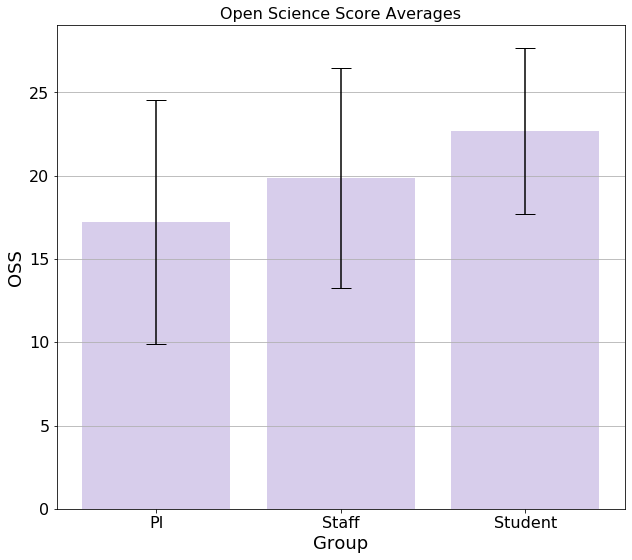

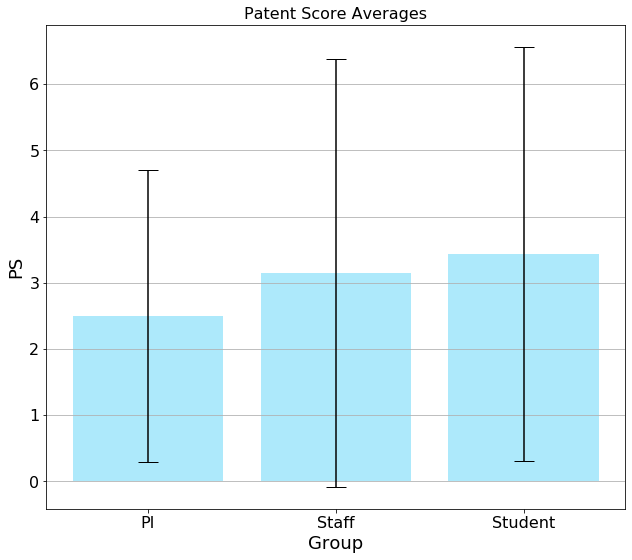

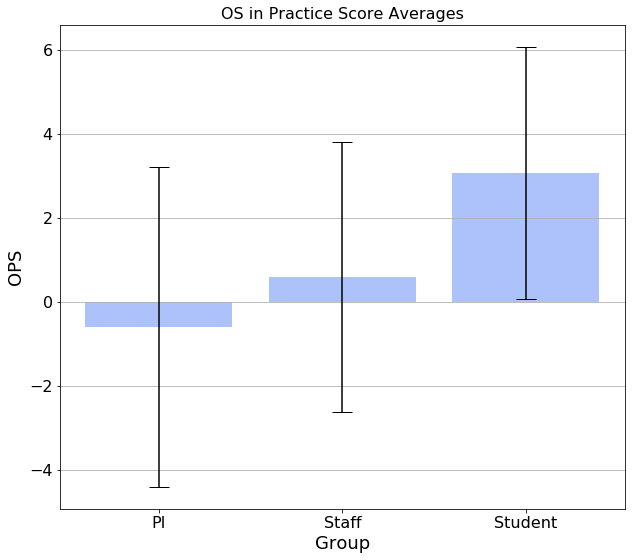

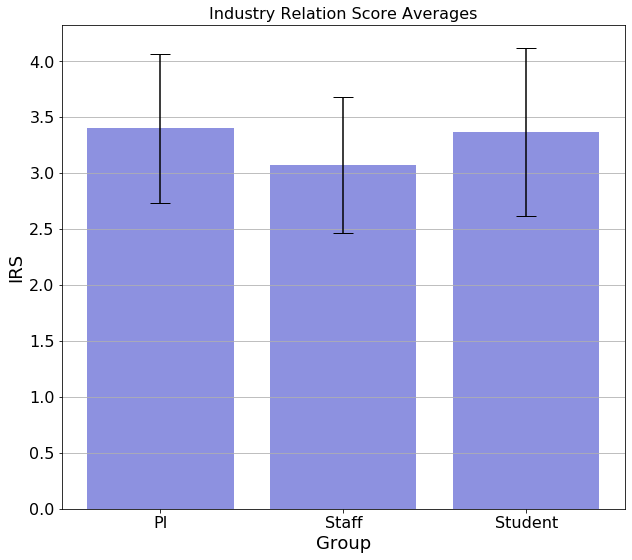

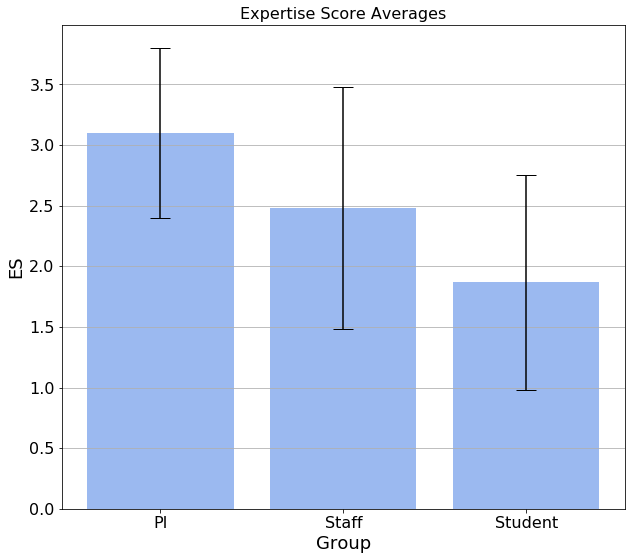

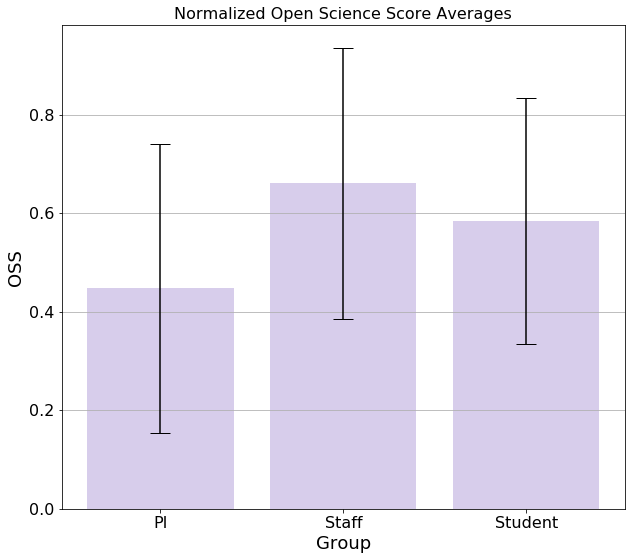

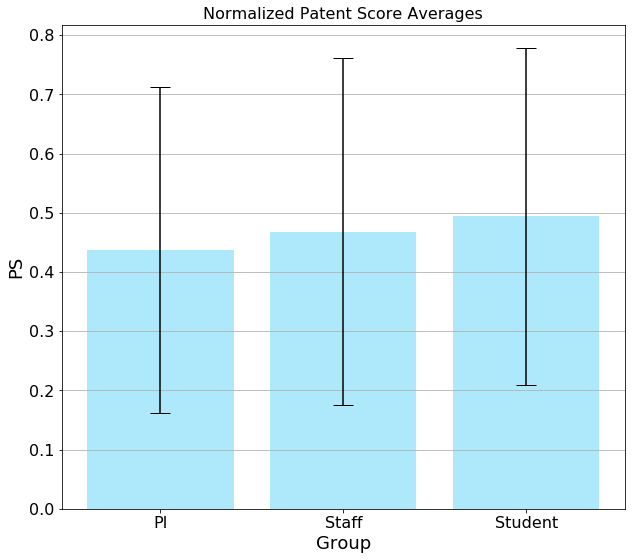

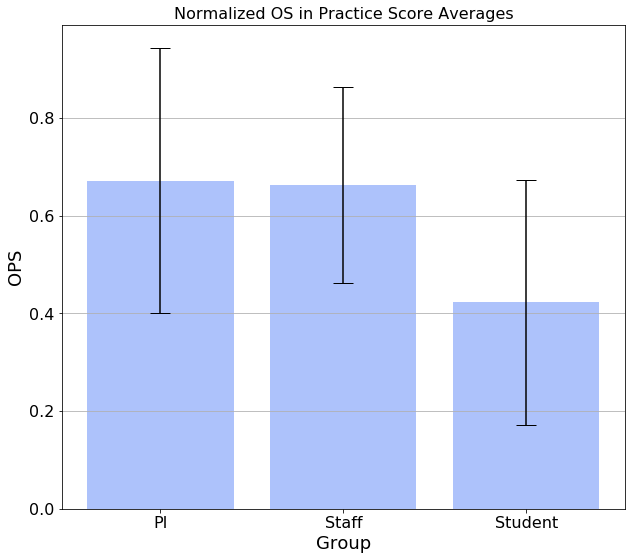

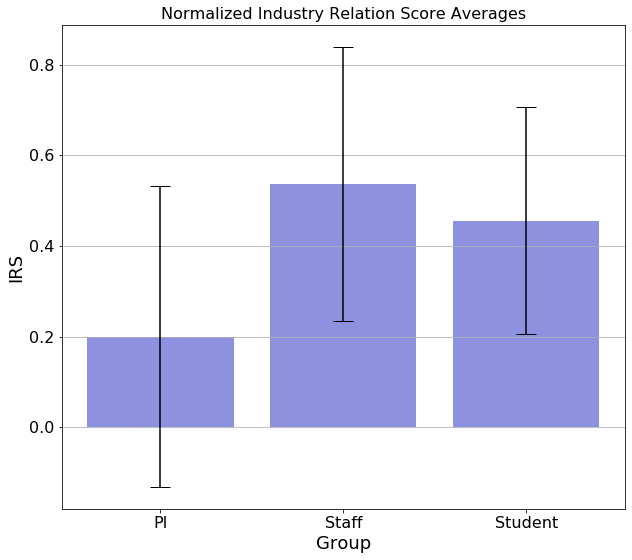

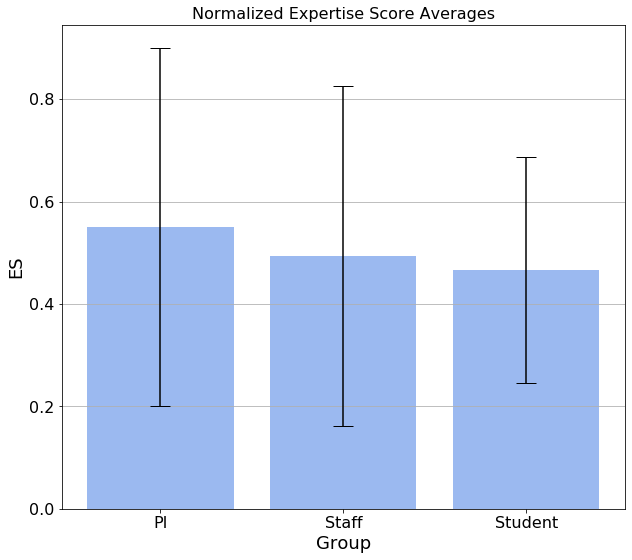

In [20]:
import matplotlib.pyplot as plt


def average_bars(PIs, Staff, Stu, title, y_lab, c):
    # Calculate the average
    PI_mean = np.mean(PIs)
    Staff_mean = np.mean(Staff)
    Stu_mean = np.mean(Stu)
                  
    # Calculate the standard deviation
    PI_std = np.std(PIs)
    Staff_std = np.std(Staff)
    Stu_std = np.std(Stu)

    # Define labels, positions, bar heights and error bar heights
    labels = ['PI', 'Staff', 'Student']
    x_pos = np.arange(len(labels))
    Culm = [PI_mean, Staff_mean, Stu_mean]
    error = [PI_std, Staff_std, Stu_std]

    # Build the plot
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 8)
    ax.bar(x_pos, Culm, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=c)
    ax.set_ylabel(y_lab, fontsize=18)
    ax.set_xlabel("Group", fontsize=18)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title, fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    new_title = title + ".jpeg"
    plt.savefig(new_title)
    plt.show()
    
average_bars(OSS_PIs, OSS_Staff, OSS_Stu, 'Open Science Score Averages', 'OSS', "#b19cd9")
average_bars(P_PIs, P_Staff, P_Stu, 'Patent Score Averages', "PS", "#5DD5F9")
average_bars(PI_PIs, PI_Staff, PI_Stu, 'OS in Practice Score Averages', "OPS", "#5D87F9")
average_bars(IR_PIs, IR_Staff, IR_Stu, 'Industry Relation Score Averages', "IRS", "#1d25c2")
average_bars(Exp_PIs, Exp_Staff, Exp_Stu, 'Expertise Score Averages', "ES", "#3974e3")


ON1,ON2,ON3 = normalizer(OSS_PIs, OSS_Staff, OSS_Stu, False)
PN1, PN2, PN3 = normalizer(P_PIs, P_Staff, P_Stu, False)
PS1, PS2, PS3 = normalizer(PI_PIs, PI_Staff, PI_Stu, False)
IR1, IR2, IR3 = normalizer(IR_PIs, IR_Staff, IR_Stu, False)
E1, E2, E3 = normalizer(Exp_PIs, Exp_Staff, Exp_Stu, False)


average_bars(ON1,ON2,ON3, 'Normalized Open Science Score Averages', 'OSS', "#b19cd9")
average_bars(PN1, PN2, PN3, 'Normalized Patent Score Averages', "PS", "#5DD5F9")
average_bars(PS1, PS2, PS3, 'Normalized OS in Practice Score Averages', "OPS", "#5D87F9")
average_bars(IR1, IR2, IR3, 'Normalized Industry Relation Score Averages', "IRS", "#1d25c2")
average_bars(E1, E2, E3, 'Normalized Expertise Score Averages', "ES", "#3974e3")


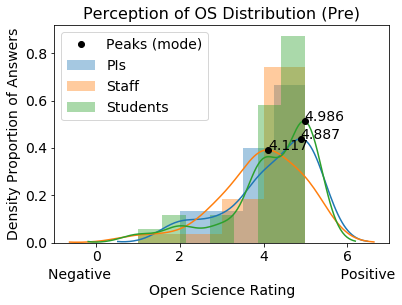

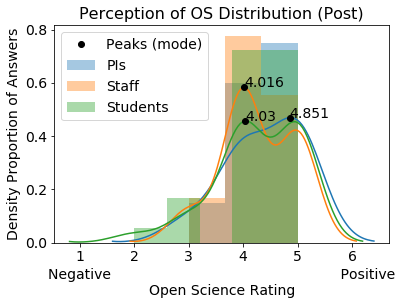

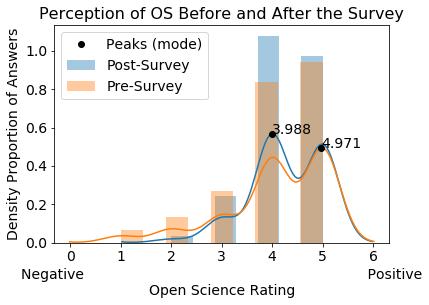

In [21]:
Pre_PIs=Per_PIs[:,0]
Post_PIs=Per_PIs[:,1]
Pre_Staff=Per_Staff[:,0]
Post_Staff=Per_Staff[:,1]
Pre_Stu=Per_Stu[:,0]
Post_Stu=Per_Stu[:,1]
Pre_All=Per_All[:,0]
Post_All=Per_All[:,1]

import seaborn as sns

fig, ax = plt.subplots()
x_coords = []
y_coords = []

sns.distplot(Pre_PIs, ax=ax, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax.lines[0]),x_coords, y_coords)
sns.distplot(Pre_Staff, ax=ax, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax.lines[1]),x_coords, y_coords)
sns.distplot(Pre_Stu, ax=ax, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax.lines[2]),x_coords, y_coords)

plt.plot(x_coords, y_coords, 'ko')

for i in range(3):
    ax.text(x_coords[i], y_coords[i], round(x_coords[i],3))
    
plt.legend(["Peaks (mode)","PIs", "Staff", "Students"])
ax.set_title("Perception of OS Distribution (Pre)",fontsize=16)
ax.set_ylabel("Density Proportion of Answers", fontsize=14)
ax.set_xlabel("Negative                                                   Positive\nOpen Science Rating", fontsize=14)
plt.savefig('figures/Distribution_OS_Perception_Pre.jpeg')
plt.show()


fig2, ax2 = plt.subplots()
x_coords = []
y_coords = []

sns.distplot(Post_PIs, ax=ax2, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax2.lines[0]),x_coords, y_coords)
sns.distplot(Post_Staff, ax=ax2, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax2.lines[1]),x_coords, y_coords)
sns.distplot(Post_Stu, ax=ax2, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax2.lines[2]),x_coords, y_coords)

plt.plot(x_coords, y_coords, 'ko')

for i in range(3):
    ax2.text(x_coords[i], y_coords[i], round(x_coords[i],3))
    
plt.legend(["Peaks (mode)","PIs", "Staff", "Students"])
ax2.set_title("Perception of OS Distribution (Post)",fontsize=16)
ax2.set_ylabel("Density Proportion of Answers", fontsize=14)
ax2.set_xlabel("Negative                                                   Positive\nOpen Science Rating", fontsize=14)
plt.savefig('figures/Distribution_OS_Perception_Post.jpeg')
plt.show()


fig3, ax3 = plt.subplots()
x_coords = []
y_coords = []
sns.distplot(Post_All, ax=ax3, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax3.lines[0]),x_coords, y_coords)
sns.distplot(Pre_All, ax=ax3, norm_hist=False)
x_coords,y_coords = add_coords(peak_coord(ax3.lines[1]),x_coords, y_coords)

plt.plot(x_coords, y_coords, 'ko')

for i in range(2):
    ax3.text(x_coords[i], y_coords[i], round(x_coords[i],3))
    
plt.legend(["Peaks (mode)","Post-Survey", "Pre-Survey"])
ax3.set_title("Perception of OS Before and After the Survey",fontsize=16)
ax3.set_ylabel("Density Proportion of Answers", fontsize=14)
ax3.set_xlabel("Negative                                                               Positive\nOpen Science Rating", fontsize=14)
plt.savefig('figures/Distribution_OS_Perception_All.jpeg')
plt.show()

      Group      Score     Metric  Subject
0        PI  17.200000        OSS        0
1     Staff  19.851852        OSS        1
2   Student  22.666667        OSS        2
3        PI   2.500000    P_Score        0
4     Staff   3.148148    P_Score        1
5   Student   3.433333    P_Score        2
6        PI  -0.600000   OP_Score        0
7     Staff   0.592593   OP_Score        1
8   Student   3.066667   OP_Score        2
9        PI   3.400000   IR_Score        0
10    Staff   3.074074   IR_Score        1
11  Student   3.366667   IR_Score        2
12       PI   3.100000  Exp_Score        0
13    Staff   2.481481  Exp_Score        1
14  Student   1.866667  Exp_Score        2

ANOVA SUMMARY

Source            SS    DF1    DF2       MS        F    np2      eps
-----------  -------  -----  -----  -------  -------  -----  -------
Group          7.841      2      0    3.920  nan      1.000  nan
Metric       740.323      4      0  185.081    0.000  1.000    0.258
Interaction   15.384    

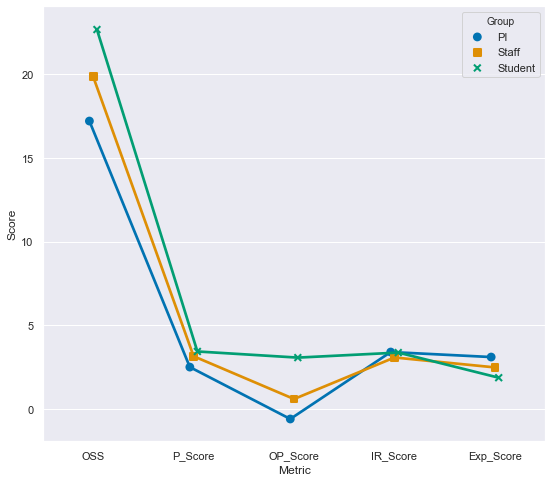

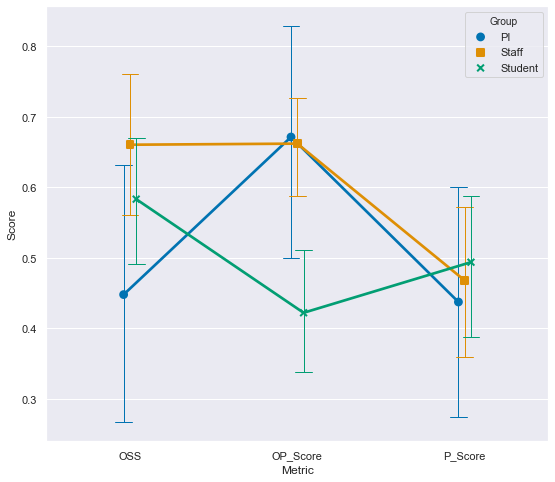

In [23]:
def processer(df):
    scores = [df['OSS'][ind] for ind in df.index]
    scores = add_scores(scores, df['P_Score'])
    scores = add_scores(scores, df['PI_Score'])
    scores = add_scores(scores, df['IR_Score'])
    scores = add_scores(scores, df['Exp_Score'])
    
    groups=['PI', 'Staff', 'Student','PI', 'Staff', 'Student','PI', 'Staff', 'Student','PI', 'Staff', 'Student','PI', 'Staff', 'Student']
    
    metrics=['OSS', 'OSS', 'OSS', 'P_Score','P_Score','P_Score','OP_Score','OP_Score','OP_Score','IR_Score','IR_Score','IR_Score', 'Exp_Score','Exp_Score','Exp_Score']

    subjects=[0,1,2,0,1,2,0,1,2,0,1,2,0,1,2]
    new_df = pd.DataFrame(data={'Group':groups,
             'Score':scores,
             'Metric':metrics,
             'Subject':subjects})
    
    return new_df

def process_one(df, col):
    scores = [df[col][ind] for ind in df.index]
    groups = ['PI', 'Staff', 'Student']
    return(pd.DataFrame(data={'Group':groups, 'Score':scores}))

def add_scores(scores, col):
    for x in col:
        scores.append(x)
    return scores


import pingouin as pg
import seaborn as sns

aov_raw_prcd = processer(Anova_raw)
print(aov_raw_prcd)

fig, ax = plt.subplots()
fig.set_size_inches(9, 8)
sns.set()
sns.pointplot(ax=ax, data=aov_raw_prcd, x='Metric', y='Score', hue='Group', dodge=True, markers=['o', 's', 'x'], capsize=.1, errwidth=1, palette='colorblind')


aov = pg.mixed_anova(dv="Score", within='Metric', between='Group', subject='Subject',data=aov_raw_prcd)
pg.print_table(aov)

print("Normalized Anova Values")
aov_norm_prcd = processer(Anova_norm_avg)
aov2 = pg.mixed_anova(dv="Score", within='Metric', between='Group', subject='Subject',data=aov_norm_prcd)
pg.print_table(aov2)

print("Only looking at Metrics")
aov3 = pg.rm_anova(dv="Score", within='Metric', subject='Subject',data=aov_norm_prcd, detailed=True)
pg.print_table(aov3)

print("Epsilon calculation")
print(pg.epsilon(data=aov_norm_prcd, dv='Score', subject='Subject',
           within='Metric', correction='gg'))

print("\nRecalculated with correction")
aov3 = pg.rm_anova(dv="Score", within='Metric', subject='Subject',data=aov_norm_prcd, correction=True, detailed=True)
pg.print_table(aov3)

aov_OSS = process_one(Anova_norm_avg, 'OSS')
aov_OPS = process_one(Anova_norm_avg, 'PI_Score')
aov_PS = process_one(Anova_norm_avg, 'P_Score')
aov_IR = process_one(Anova_norm_avg,'IR_Score')
aov_Exp = process_one(Anova_norm_avg, 'Exp_Score')

aov4=pg.anova(dv='Score', between='Group', data=aov_OSS, detailed=True)
pg.print_table(aov4)

aov5=pg.anova(dv='Score', between='Group', data=aov_OPS, detailed=True)
pg.print_table(aov5)

def full_processer(PIs, Staff, Stu):
    scores = [x for x in PIs]
    groups = ["PI" for i in range(len(PIs))]
    for x in Staff:
        scores.append(x)
        groups.append("Staff")
    for x in Stu:
        scores.append(x)
        groups.append("Student")
    
    return(pd.DataFrame({'Score':scores, 'Group':groups}))

print("\nAll OSS Scores run through one way ANOVA")
OSS_Full = full_processer(OSS_PIs, OSS_Staff, OSS_Stu)
aov6=pg.anova(dv='Score', between='Group', data=OSS_Full, detailed=True)
pg.print_table(aov6)

print("\nAll PI Scores run through one way ANOVA")
PI_Full = full_processer(PI_PIs, PI_Staff, PI_Stu)
aov7=pg.anova(dv='Score', between='Group', data=PI_Full, detailed=True)
pg.print_table(aov7)

P_Full = full_processer(P_PIs, P_Staff, P_Stu)

def processed_append(OSS_Full, PI_Full, P_Full):
    All_Full = OSS_Full.append(PI_Full)
    All_Full = All_Full.append(P_Full)
    metrics = ['OSS' for i in range(len(OSS_Full))]
    for i in range(len(PI_Full)):
        metrics.append("OP_Score")
    for i in range(len(P_Full)):
        metrics.append("P_Score")
    All_Full.insert(len(All_Full.columns),'Metric', metrics)
    subjects = [i for i in range(len(OSS_Full))]
    subjects = subjects + subjects + subjects
    All_Full.insert(len(All_Full.columns),'Subject', subjects)

    return All_Full

All_Full = processed_append(OSS_Full, PI_Full, P_Full)
aov8=pg.mixed_anova(dv="Score", within='Metric', between='Group', subject='Subject',data=All_Full)
pg.print_table(aov8)

def raw_to_norm(PIs, Staff, Stu):
    x,y,z = normalizer(PIs, Staff, Stu, False)
    normed = full_processer(x,y,z)
    return(normed)
OSS_norm_Full = raw_to_norm(OSS_PIs, OSS_Staff, OSS_Stu)
PI_norm_Full = raw_to_norm(PI_PIs, PI_Staff, PI_Stu)
P_norm_Full = raw_to_norm(P_PIs, P_Staff, P_Stu)

All_norm_Full = processed_append(OSS_norm_Full, PI_norm_Full, P_norm_Full)
aov9=pg.mixed_anova(dv="Score", within='Metric', between='Group', subject='Subject',data=All_norm_Full)
pg.print_table(aov9)

posthocs = pg.pairwise_ttests(dv='Score', within='Metric', between='Group',
                              subject='Subject', data=All_norm_Full)
pg.print_table(posthocs)

fig, ax = plt.subplots()
fig.set_size_inches(9, 8)
sns.set()
sns.pointplot(ax=ax, data=All_norm_Full, x='Metric', y='Score', hue='Group', dodge=True, markers=['o', 's', 'x'], capsize=.1, errwidth=1, palette='colorblind')

#conclusions as title of slide; point first presentation
#presenting to a general audience, make sure its in plain english; don't be too technical
#make it simple to understand; emphasis on p values rather than
#go back to original data that's what people remember
#can overlay the graph with different analysis of things like if you're saying a certain conclusion, overlay a p score or n values etc
#use normalized
#provide summary of key points with most effective data visualizations

#OSS*P
#PI*P

#Staff*Student

#OSS*PI*Staff
#PI*PI*Stu
#PI*Staff*Stu




ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  -----  -----  -----  -----  ------  -------  -----------  -----  -------  ------------  ---------  ---------
Group        0.758      2     64  0.379   0.383    0.683      nan      0.012  nan           nan        nan        nan
Area         7.495      2    128  3.747  11.029    0.000        0.000  0.147    0.788         0.000      0.730      0.000
Interaction  0.673      4    128  0.168   0.496    0.739      nan      0.015  nan           nan        nan        nan


POST HOC TESTS

Contrast      Area        A        B                       Paired    Parametric         T      dof  Tail         p-unc       BF10    hedges
------------  ----------  -------  ----------------------  --------  ------------  ------  -------  ---------  -------  ---------  --------
Area          -           Intro    Access                  True      True          -

/Users/kartoffello/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 66, but rank is 34
  'rank is %d' % (J, J_), ValueWarning)
/Users/kartoffello/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 132, but rank is 80
  'rank is %d' % (J, J_), ValueWarning)
/Users/kartoffello/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 132, but rank is 60
  'rank is %d' % (J, J_), ValueWarning)
/Users/kartoffello/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 264, but rank is 134
  'rank is %d' % (J, J_), ValueWarning)



ANOVA SUMMARY

Source                         SS        DF      MS        F    p-unc      np2
----------------------  ---------  --------  ------  -------  -------  -------
Area                        0.040     2.000   0.020    0.018    0.982    0.000
Subject                   -14.221    66.000  -0.215   -0.192    1.000   -0.012
Group                      -0.000     2.000  -0.000   -0.000    1.000   -0.000
Area * Subject              9.797   132.000   0.074    0.066    1.000    0.008
Area * Group                0.104     4.000   0.026    0.023    0.999    0.000
Subject * Group         13126.139   132.000  99.440   88.564    0.000    0.916
Area * Subject * Group    208.493   264.000   0.790    0.703    0.995    0.148
Residual                 1203.647  1072.000   1.123  nan      nan      nan


ANOVA SUMMARY

Source            SS    DF1    DF2      MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  -------  -----  -----  ------  ------  ----

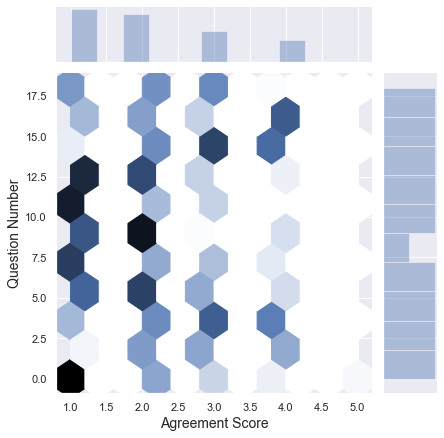

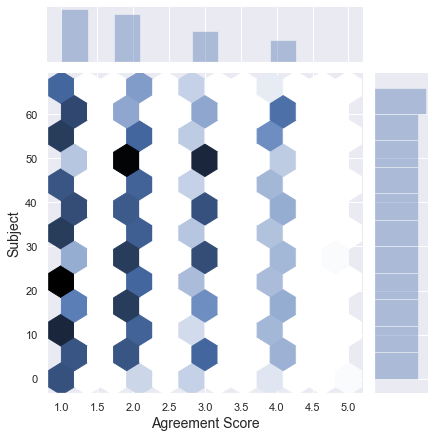

In [271]:
#Anova_Data has all the questions, what if we run an anova along this

aov_all=pg.mixed_anova(dv="Score", within='Area', between='Group', subject='Subject',data=Anova_Data)
pg.print_table(aov_all)

posthocs = pg.pairwise_ttests(dv='Score', within='Area', between='Group',
                              subject='Subject', data=Anova_Data)
pg.print_table(posthocs)


aov_all=pg.anova(dv="Score", between=['Area','Subject','Group'], detailed=True, data=Anova_Data)
pg.print_table(aov_all)

#posthocs = pg.pairwise_ttests(dv='Score', between=['Area','Subject','Group'], data=Anova_Data)
#pg.print_table(posthocs)

aov_all=pg.mixed_anova(dv="Score", within='Question', between='Group', subject='Subject',data=Anova_Data)
pg.print_table(aov_all)

#posthocs = pg.pairwise_ttests(dv='Score', within='Question', between='Group',
#                              subject='Subject', data=Anova_Data)
#pg.print_table(posthocs)

raw_PIs = []
raw_Stu = []
raw_Staff = []
raw_all = []
questions=[]
subjects = []

for ind,row in Anova_Data.iterrows():
    if(row['Group']=='PIs'):
        raw_PIs.append(row['Score'])
    elif(row['Group']=='Students'):
        raw_Students.append(row['Score'])
    else:
        raw_Staff.append(row['Score'])
    raw_all.append(row['Score'])
    questions.append(row['Question'])
    subjects.append(row['Subject'])

hex_plot = sns.jointplot(raw_all, questions, kind='hex')
#hex_plot.set_title("Density of intersection of OSS and OPS",fontsize=16)
hex_plot.set_axis_labels("Agreement Score", "Question Number", fontsize=14)

hex_plot = sns.jointplot(raw_all, subjects, kind='hex')
hex_plot.set_axis_labels("Agreement Score", "Subject", fontsize=14)


Open Science Score Distributions


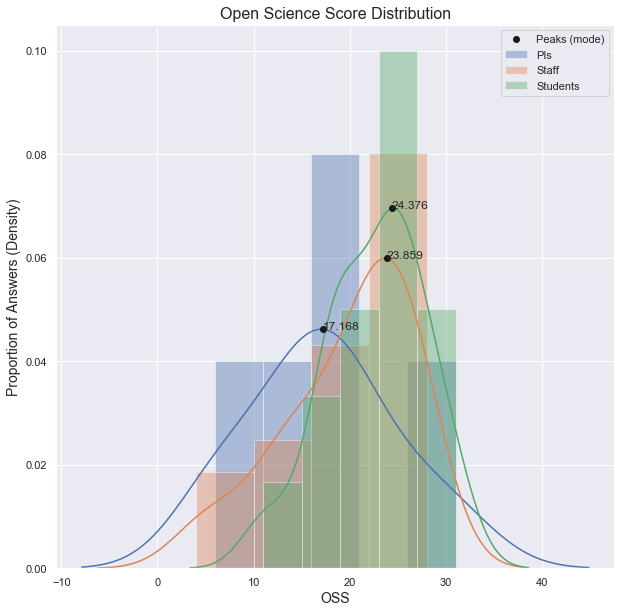

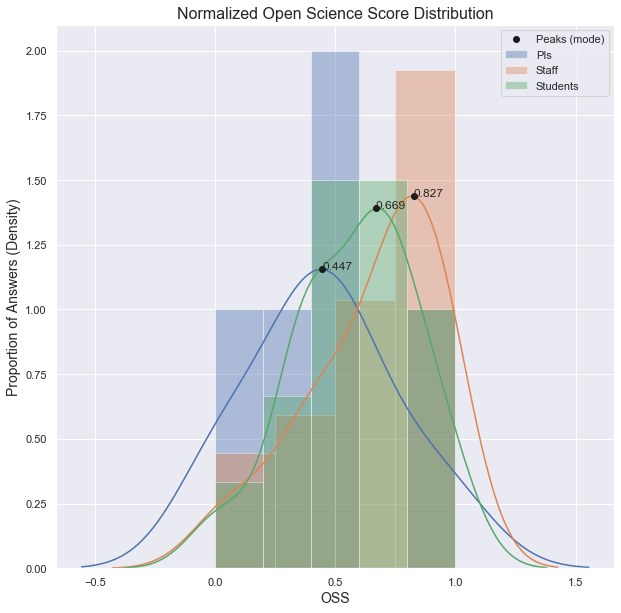

Patent Score Distributions


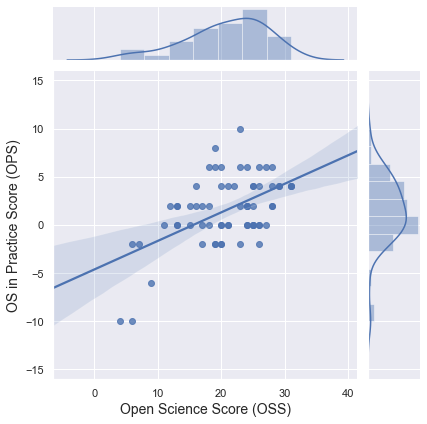

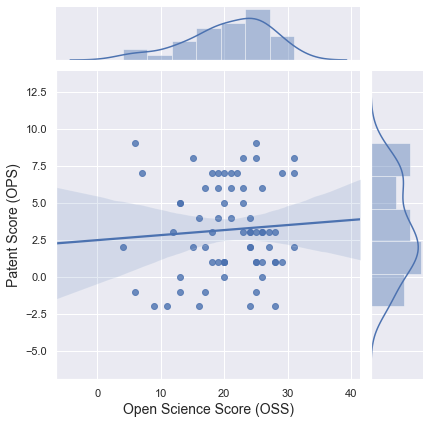

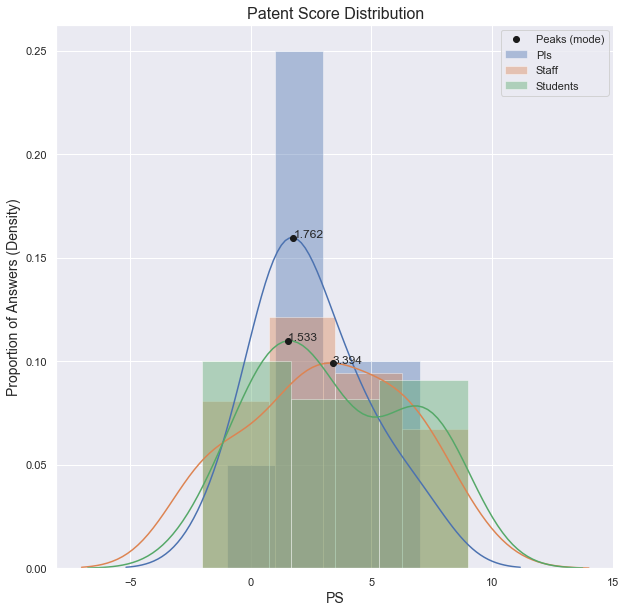

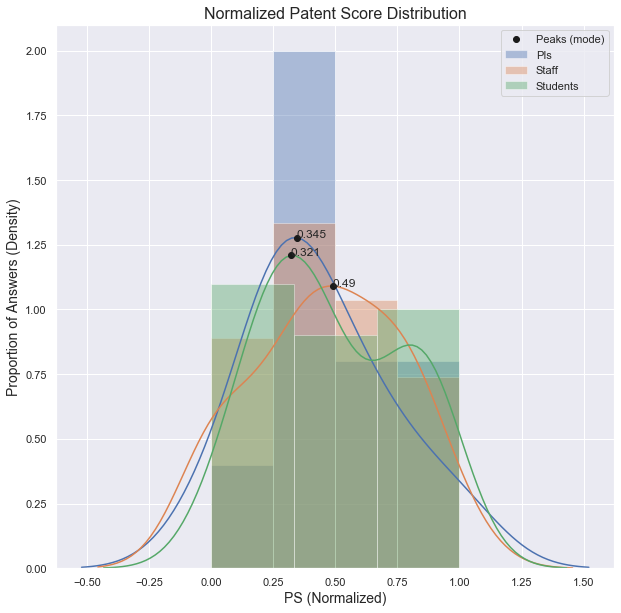

Open Science in Practice Score Distributions


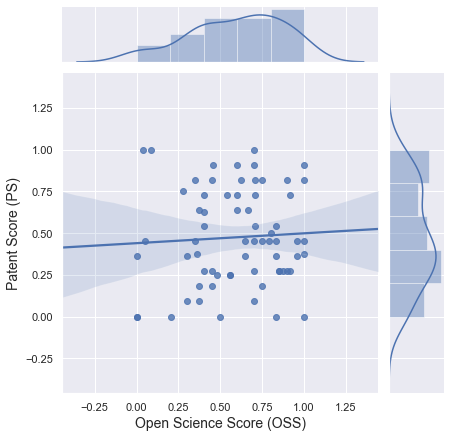

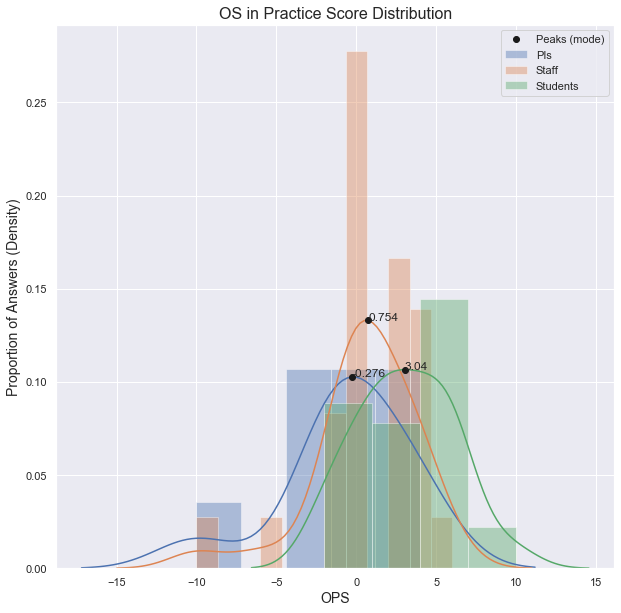

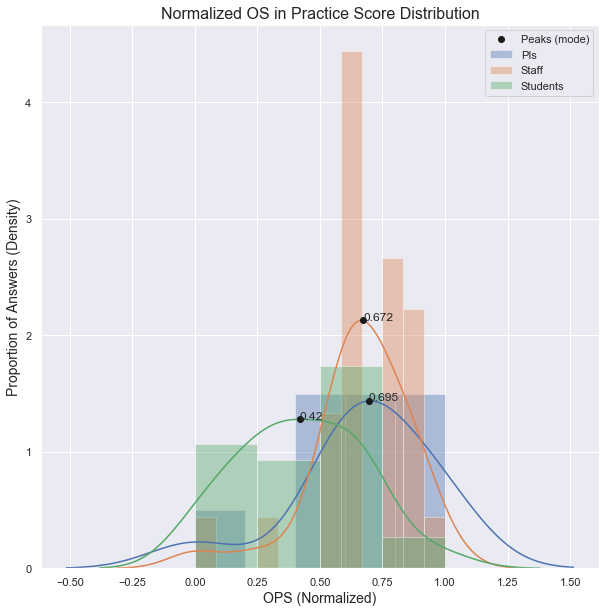

Industry Relation Score Distributions


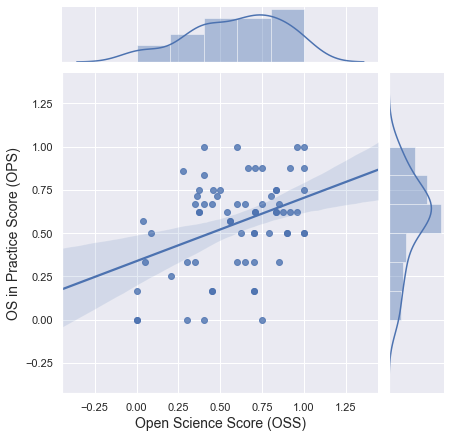

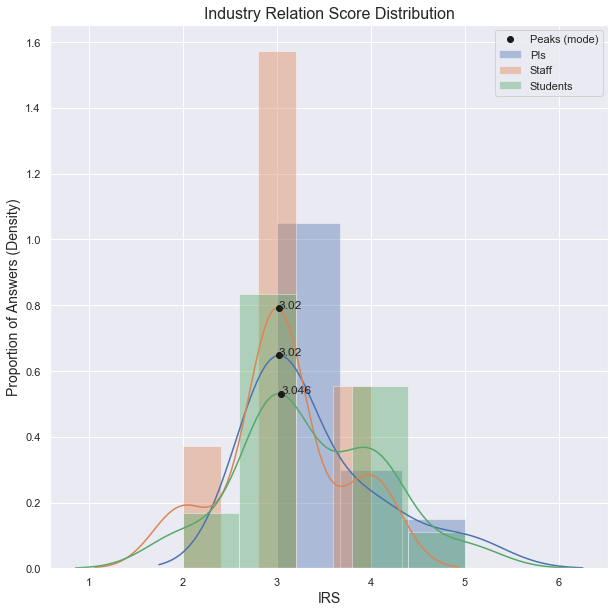

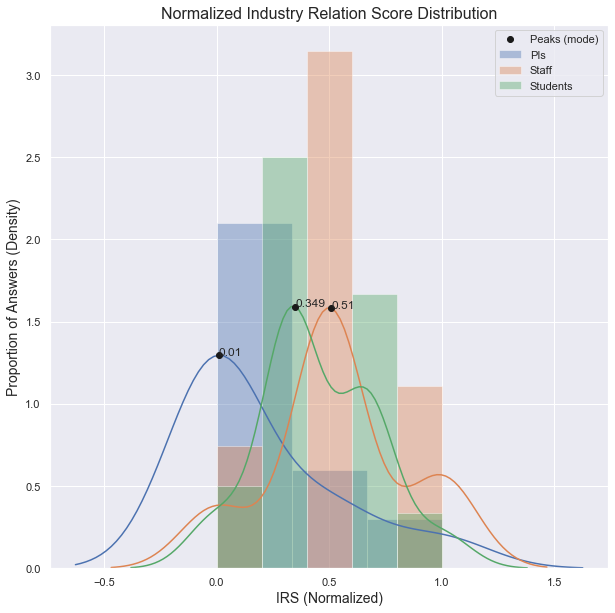

[3, 3, 3, 5, 4, 3, 4, 3, 3, 3]
[0.0, 0.0, 0.0, 1.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 1.0, 0.5, 0.5, 0.5, 0.0, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 1.0, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 1.0, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333]
Expertise Score Distributions


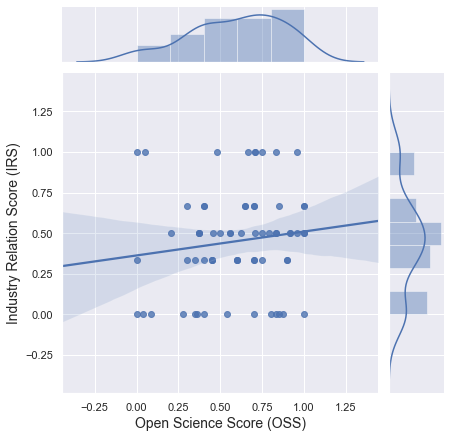

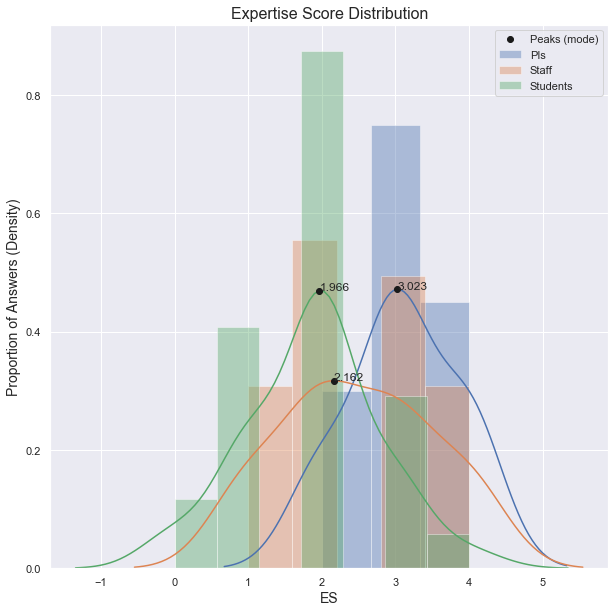

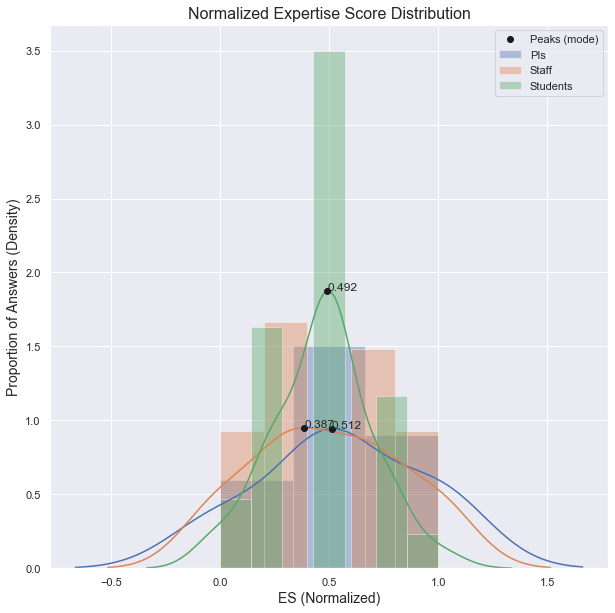

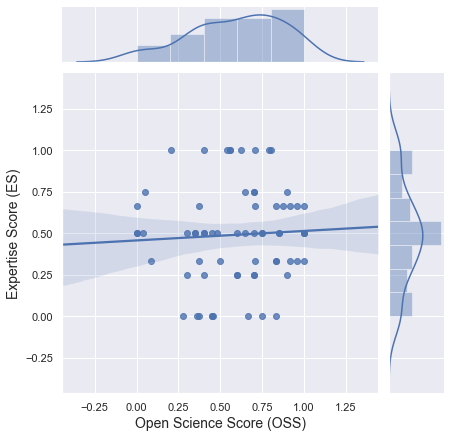

In [29]:
#OSS Distribution

def peak_coord(axis_line):
    x = axis_line.get_xdata()
    y = axis_line.get_ydata()
    maxid = np.argmax(y)
    return x[maxid],y[maxid]

def add_coords(xy, x, y):
    x.append(xy[0])
    y.append(xy[1])
    return x, y

def distribution_plot(PIs, Staff, Stu, title, ylab, xlab):
    sns.distributions._has_statsmodels = False
    x_coords = []
    y_coords = []
    fig, ax = plt.subplots()
    fig.set_size_inches(10,10)
    sns.distplot(PIs, ax=ax)
    sns.distplot(Staff, ax=ax)
    sns.distplot(Stu, ax=ax)
    ax.set_title(title,fontsize=16)
    ax.set_ylabel(ylab, fontsize=14)
    ax.set_xlabel(xlab, fontsize=14)

    x_coords,y_coords = add_coords(peak_coord(ax.lines[0]),x_coords, y_coords)
    x_coords,y_coords = add_coords(peak_coord(ax.lines[1]),x_coords, y_coords)
    x_coords,y_coords = add_coords(peak_coord(ax.lines[2]),x_coords, y_coords)
    plt.plot(x_coords, y_coords, 'ko')
    for i in range(3):
        ax.text(x_coords[i], y_coords[i], round(x_coords[i],3))
    plt.legend(["Peaks (mode)", "PIs", "Staff", "Students"])
    plt.show()


print("Open Science Score Distributions")
distribution_plot(OSS_PIs,OSS_Staff,OSS_Stu,"Open Science Score Distribution", "Proportion of Answers (Density)", "OSS")
x1,x2,x3 = normalizer(OSS_PIs, OSS_Staff, OSS_Stu, False)
distribution_plot(x1,x2,x3,"Normalized Open Science Score Distribution", "Proportion of Answers (Density)", "OSS")
hex_plot = sns.jointplot(OSS_Full['Score'], PI_Full['Score'], kind='reg')
#hex_plot.set_title("Density of intersection of OSS and OPS",fontsize=16)
hex_plot.set_axis_labels("Open Science Score (OSS)", "OS in Practice Score (OPS)", fontsize=14)


hex_plot = sns.jointplot(OSS_Full['Score'], P_Full['Score'], kind='reg')
hex_plot.set_axis_labels("Open Science Score (OSS)", "Patent Score (OPS)", fontsize=14)

#Patent Score Distribution

print("Patent Score Distributions")
distribution_plot(P_PIs,P_Staff,P_Stu,"Patent Score Distribution", "Proportion of Answers (Density)", "PS")
x1a,x2a,x3a = normalizer(P_PIs, P_Staff, P_Stu, False)
distribution_plot(x1a,x2a,x3a,"Normalized Patent Score Distribution", "Proportion of Answers (Density)", "PS (Normalized)")

P_coords = x1a+x2a+x3a
OSS_coords = x1+x2+x3

hex_plot = sns.jointplot(OSS_coords, P_coords, kind='reg')
hex_plot.set_axis_labels("Open Science Score (OSS)", "Patent Score (PS)", fontsize=14)

print("Open Science in Practice Score Distributions")
distribution_plot(PI_PIs,PI_Staff,PI_Stu,"OS in Practice Score Distribution", "Proportion of Answers (Density)", "OPS")
x1b,x2b,x3b = normalizer(PI_PIs, PI_Staff, PI_Stu, False)
distribution_plot(x1b,x2b,x3b,"Normalized OS in Practice Score Distribution", "Proportion of Answers (Density)", "OPS (Normalized)")

OPS_coords = x1b+x2b+x3b

hex_plot = sns.jointplot(OSS_coords, OPS_coords, kind='reg')
hex_plot.set_axis_labels("Open Science Score (OSS)", "OS in Practice Score (OPS)", fontsize=14)

print("Industry Relation Score Distributions")
distribution_plot(IR_PIs,IR_Staff,IR_Stu,"Industry Relation Score Distribution", "Proportion of Answers (Density)", "IRS")
x1c,x2c,x3c = normalizer(IR_PIs, IR_Staff, IR_Stu, False)
distribution_plot(x1c,x2c,x3c,"Normalized Industry Relation Score Distribution", "Proportion of Answers (Density)", "IRS (Normalized)")
print(IR_PIs)
IR_coords = x1c+x2c+x3c
print(IR_coords)


hex_plot = sns.jointplot(OSS_coords, IR_coords, kind='reg')
hex_plot.set_axis_labels("Open Science Score (OSS)", "Industry Relation Score (IRS)", fontsize=14)

print("Expertise Score Distributions")
distribution_plot(Exp_PIs,Exp_Staff,Exp_Stu,"Expertise Score Distribution", "Proportion of Answers (Density)", "ES")
x1d,x2d,x3d = normalizer(Exp_PIs, Exp_Staff, Exp_Stu, False)
distribution_plot(x1d,x2d,x3d,"Normalized Expertise Score Distribution", "Proportion of Answers (Density)", "ES (Normalized)")

Exp_coords = x1d+x2d+x3d

hex_plot = sns.jointplot(OSS_coords, Exp_coords, kind='reg')
#hex_plot.set_title("Density of intersection of OSS and OPS",fontsize=16)
hex_plot.set_axis_labels("Open Science Score (OSS)", "Expertise Score (ES)", fontsize=14)

##Change colours to be more bright;

In [61]:
# Subject | Group | Metric | Score

sub = [x for x in range(len(OSS_coords))]
subjects = sub+sub+sub+sub+sub

metrics = ["OSS" for x in range(len(OSS_coords))]
metrics = metrics+["PS" for x in range(len(OSS_coords))]
metrics = metrics+["OPS" for x in range(len(OSS_coords))]
metrics = metrics+["IR" for x in range(len(OSS_coords))]
metrics = metrics+["Exp" for x in range(len(OSS_coords))]

met = ["PI" for x in range(len(OSS_PIs))] + ["Staff" for x in range(len(OSS_Staff))] + ["Student" for x in range(len(OSS_Stu))]
groups = met+met+met+met+met

scores = OSS_coords + P_coords + OPS_coords + IR_coords + Exp_coords


two_Way_All = pd.DataFrame({"Subject":subjects,
                             "Group":groups,
                             "Metric":metrics,
                             "Score":scores})

print(two_Way_All)

aov_2way=pg.mixed_anova(dv="Score", within='Metric', between='Group', subject='Subject',data=two_Way_All)
pg.print_table(aov_2way)

posthocs = pg.pairwise_ttests(dv='Score', within='Metric', between='Group',
                              subject='Subject', effsize='glass', padjust='bonf',data=two_Way_All)
pg.print_table(posthocs)

two_Way_All.to_excel("Two Way raw Data.xlsx")
aov_2way.to_excel("Two Way ANOVA.xlsx")
posthocs.to_excel("Two Way ANOVA posthocs.xlsx")

two_Way_All = pd.DataFrame({"Subject":subjects,
                             "Group":groups,
                             "Metric":metrics,
                             "Score":scores})

print(two_Way_All)



aov_1way=pg.rm_anova(dv="Score", within='Metric', subject='Subject', data=two_Way_All)
pg.print_table(aov_1way)

posthocs = pg.pairwise_ttests(dv='Score', within='Metric', 
                              subject='Subject', effsize='glass',data=two_Way_All)

pg.print_table(posthocs)

     Subject    Group Metric  Score
0          0       PI    OSS   1.00
1          1       PI    OSS   0.28
2          2       PI    OSS   0.40
3          3       PI    OSS   0.48
4          4       PI    OSS   0.56
..       ...      ...    ...    ...
330       62  Student    Exp   0.50
331       63  Student    Exp   0.50
332       64  Student    Exp   0.75
333       65  Student    Exp   0.50
334       66  Student    Exp   0.50

[335 rows x 4 columns]

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        0.611      2     64  0.306  3.383    0.040  0.096  nan
Metric       0.962      4    256  0.240  3.189    0.014  0.047    0.904
Interaction  1.608      8    256  0.201  2.665    0.008  0.077  nan


POST HOC TESTS

Contrast        Metric    A      B        Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust       BF10    glass
--------------  -

In [8]:
#Graphics for the Averaged then the Z-Score transforms

import matplotlib.pyplot as plt

figAvg = plt.gcf()
figAvg.set_size_inches(9,8)
x = [n for n in range(len(M_All.keys()))]
ax = plt.subplot(111)
ax.bar(x, list(M_PIs.values()), width=0.25, color='b', align='center')
ax.bar([n+0.25 for n in x], list(M_Staff.values()), width=0.25, color='r', align='center')
ax.bar([n+0.5 for n in x], list(M_Stu.values()), width=0.25, color='g', align='center')

plt.xticks([n+0.25 for n in x], M_All.keys(), rotation=20, rotation_mode='anchor')
ax.tick_params(axis='x', which='major', pad=40)
plt.legend(["PIs", "Staff", "Students"])
plt.show()

NameError: name 'M_All' is not defined

<Figure size 648x576 with 0 Axes>

[6, 8, 4, 9, 4]


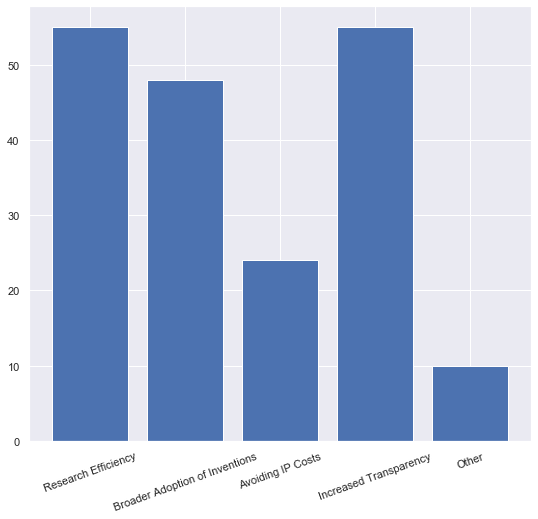

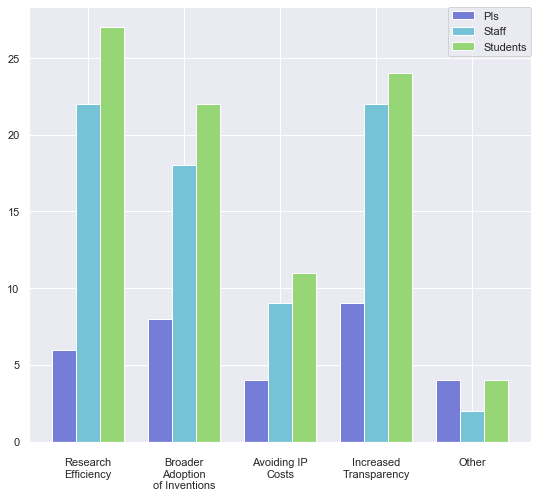

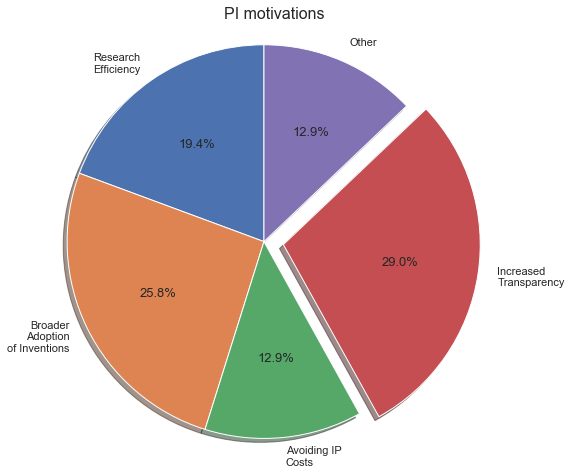

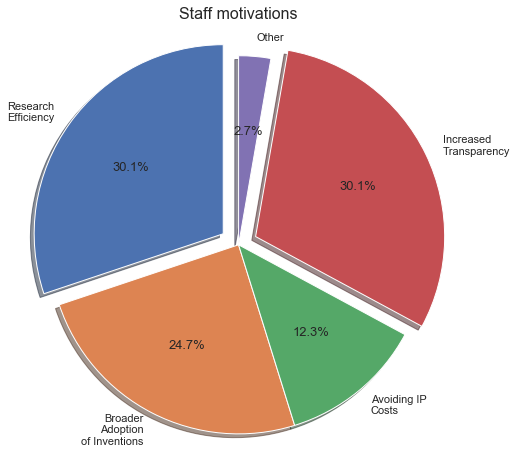

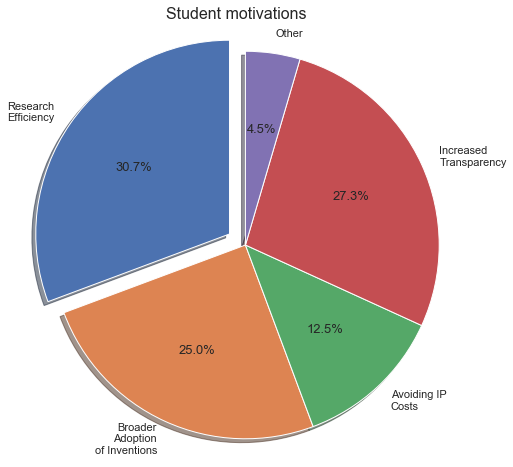

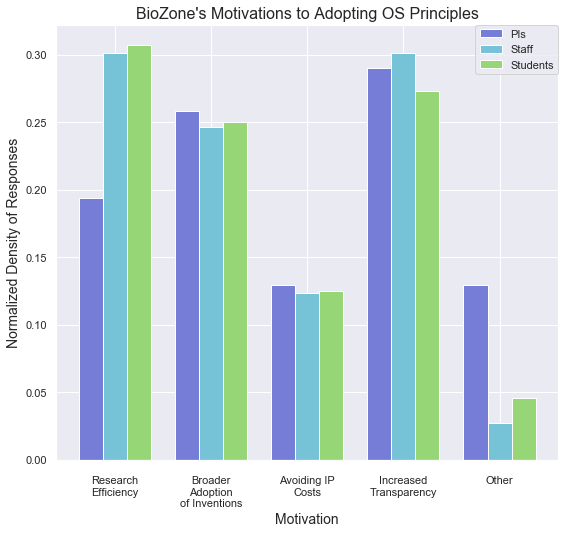

In [31]:
#Dealing with graphics for:
    #Motivation (node.motive) 
    #Rights (node.rights)
    #Engagement (node.engage)
    
def gen_Motive(responders):
    M_List = {"Research Efficiency":0, "Broader Adoption of Inventions":0,"Avoiding IP Costs":0,"Increased Transparency":0,"Other":0}
    for x in responders:
        tokens = x.motive.split(',')
        for t in tokens:
            t=t.strip()
            if t in M_List:
                M_List[t]+=1
            else:
                M_List["Other"]+=1
    return M_List

M_All = gen_Motive(responders)
M_PIs = gen_Motive(PIs)
M_Staff = gen_Motive(Staff)
M_Stu = gen_Motive(Students)

print(list(M_PIs.values()))


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 13

pi = "#767DD6"
staff = "#76C2D6"
stu = "#96D676"

fig1 = plt.gcf()
fig1.set_size_inches(9,8)
plt.bar(M_All.keys(), M_All.values())
plt.xticks(rotation=20)
plt.show()

fig2 = plt.gcf()
fig2.set_size_inches(9,8)
x = [n for n in range(len(M_All.keys()))]
ax = plt.subplot(111)
ax.bar(x, list(M_PIs.values()), width=0.25, color=pi, align='center')
ax.bar([n+0.25 for n in x], list(M_Staff.values()), width=0.25, color=staff, align='center')
ax.bar([n+0.5 for n in x], list(M_Stu.values()), width=0.25, color=stu, align='center')

plt.xticks([n+0.25 for n in x], ["Research\nEfficiency", "Broader\nAdoption\nof Inventions", "Avoiding IP\nCosts", "Increased\nTransparency", "Other"])
ax.tick_params(axis='x', which='major', pad=10)
plt.legend(["PIs", "Staff", "Students"], bbox_to_anchor=(1, 1), loc=1, borderaxespad=0)
plt.show()

fig3 = plt.gcf()
ax = plt.subplot()
labels = ["Research\nEfficiency", "Broader\nAdoption\nof Inventions", "Avoiding IP\nCosts", "Increased\nTransparency", "Other"]
sizes = M_PIs.values()
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("PI motivations", fontsize=16)
fig3.set_size_inches(8,8)
plt.savefig('figures/fig3.png')
plt.show()

fig4 = plt.gcf()
ax2 = plt.subplot()
sizes2 = M_Staff.values()
explode = (0.1, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Staff motivations", fontsize=16)
fig4.set_size_inches(8,8)
plt.savefig('figures/fig4.png')
plt.show()

fig5 = plt.gcf()
ax3 = plt.subplot()
sizes3 = M_Stu.values()
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Student motivations", fontsize=16)
fig5.set_size_inches(8,8)
plt.savefig('figures/fig5.png')
plt.show()

fig6 = plt.gcf()
fig6.set_size_inches(9,8)
x = [n for n in range(len(M_All.keys()))]
ax = plt.subplot(111)
ax.bar(x, [n/sum(M_PIs.values()) for n in M_PIs.values()], width=0.25, color=pi, align='center')
ax.bar([n+0.25 for n in x], [n/sum(M_Staff.values()) for n in M_Staff.values()], width=0.25, color=staff, align='center')
ax.bar([n+0.5 for n in x], [n/sum(M_Stu.values()) for n in M_Stu.values()], width=0.25, color=stu, align='center')

plt.xticks([n+0.25 for n in x], ["Research\nEfficiency", "Broader\nAdoption\nof Inventions", "Avoiding IP\nCosts", "Increased\nTransparency", "Other"])
ax.tick_params(axis='x', which='major', pad=10)
plt.legend(["PIs", "Staff", "Students"], bbox_to_anchor=(1, 1), loc=1, borderaxespad=0)
ax.set_title("BioZone's Motivations to Adopting OS Principles",fontsize=16)
ax.set_ylabel("Normalized Density of Responses", fontsize=14)
ax.set_xlabel("Motivation", fontsize=14)
plt.savefig('figures/fig6.png')
plt.show()




In [9]:
#Dealing with graphics for: 
    #Rights

def gen_Rights(responders):
    acd = []
    ind = []
    pub = []
    for x in responders:
        L = x.rights
        acd.append(L[0])
        ind.append(L[1])
        pub.append(L[2])
    return acd, ind, pub

def make_Dict(r_resps):
    dictList = []
    for group in r_resps:
        newD = {"Full Rights":0, "Partial Rights":0, "No Rights":0}
        for r in group:
            if r == 'Claims to part of the rights':
                newD["Partial Rights"]+=1
            elif r == 'No Claims to Rights':
                newD["No Rights"]+=1
            else:
                newD["Full Rights"]+=1
        dictList.append(newD)
    return dictList

def avg_List(dataList):
    print(dataList)
    num = sum(np.array(list(dataList)))
    dList2 = []
    for d in dataList:
        dList2.append(d/num)
    print(dList2)
    return dList2
        

R_All = make_Dict(gen_Rights(responders))
R_PIs = make_Dict(gen_Rights(PIs))
R_Staff = make_Dict(gen_Rights(Staff))
R_Stu = make_Dict(gen_Rights(Students))
labels = ["Academics", "Industry", "Tax Payers"]
ful = "#DAF7A6"
par = "#FFC300"
non = "#FF5733"

fig = plt.gcf()
fig.set_size_inches(9,8)
x = [n for n in range(len(R_All[0].keys()))]
ax = plt.subplot(111)
ax.bar(x, list(R_All[0].values()), width=0.25, color=ful, align='center')
ax.bar([n+0.25 for n in x], list(R_All[1].values()), width=0.25, color=par, align='center')
ax.bar([n+0.5 for n in x], list(R_All[2].values()), width=0.25, color=non, align='center')

plt.xticks([n+0.25 for n in x], labels, rotation=20, rotation_mode='anchor')
ax.tick_params(axis='x', which='major', pad=40)
plt.legend(R_All[0].keys())
plt.show()


fig2 = plt.gcf()
fig2.set_size_inches(9,8)
x = [n for n in range(len(R_All[0].keys()))]
ax = plt.subplot()
R_All[0].values
ax.bar(x, avg_List(R_All[0].values()), width=0.25, color=ful, align='center')
ax.bar([n+0.25 for n in x], avg_List(R_All[1].values()), width=0.25, color=par, align='center')
ax.bar([n+0.5 for n in x], avg_List(R_All[2].values()), width=0.25, color=non, align='center')

plt.xticks([n+0.25 for n in x], labels, rotation=20, rotation_mode='anchor')
ax.tick_params(axis='x', which='major', pad=40)
plt.legend(R_All[0].keys())
plt.show()





NameError: name 'PIs' is not defined

In [12]:
#Running a 2-way ANOVA

import pandas as pdimport, statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

#create a dataframe of Label1 x Label2 
    #eg: Student/Staff/PI
    #    OSS
    #    PI_S
    #    P_S
print(R_All)
columns = R_All[0].keys()
index = ["Academia", "Industry", "Tax Payers"]
populate = []
for x in R_All:
    newD = {}
    for c in columns:
        if c in newD:
            newD[c].append(x[c])
        else:
            newD[c]=x[c]
    populate.append(newD)
P_to_R = pd.DataFrame(populate, columns = columns, index=index)
print(P_to_R)

#Degrees of Freedom
N=len(P_to_R.index)*len(P_to_R.columns)
df = N-1

grand_mean = np.average(P_to_R)
ssq_p = sum([(np.average(row)-grand_mean)**2 for i,row in P_to_R.iterrows()])

ssq_r = sum([(np.average(P_to_R[x])-grand_mean)**2 for x in columns])
print(ssq_p)
for i,row in P_to_R.iterrows():
    print(np.average(row))
    
#Issue here is that the rows are REPEATED MEASURES this is a mixed model ANOVA
#use Seaborn; the rights is the "within groups" measure while parties are "between groups"


[{'Full Rights': 3, 'Partial Rights': 58, 'No Rights': 6}, {'Full Rights': 10, 'Partial Rights': 49, 'No Rights': 8}, {'Full Rights': 10, 'Partial Rights': 35, 'No Rights': 22}]
            Full Rights  Partial Rights  No Rights
Academia              3              58          6
Industry             10              49          8
Tax Payers           10              35         22
0.0
22.333333333333332
22.333333333333332
22.333333333333332


In [234]:
#Dealing with graphics for:
    #Engagement

def gen_Engage(responders):
    E_List = []
    for x in responders:
        E_List.append(x.engage)
    return E_List

E_All = gen_Engage(responders)
E_PIs = gen_Engage(PIs)
E_Staff = gen_Engage(Staff)
E_Stu = gen_Engage(Students)

#print(E_All)

#Finally Engagement
#X Values
#Y Values